<a href="https://colab.research.google.com/github/UjjwalaVayuvegula/ujjwala_Batch115/blob/main/Visualization_main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libraries

In [1159]:
import pandas as pd
import numpy as np
import datetime
from datetime import timedelta
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import GridSearchCV
import warnings

In [1160]:
warnings.filterwarnings("ignore")

# Working with Customer data

In [1161]:
customerdata=pd.read_excel("/content/drive/MyDrive/DataForPHD/TrainData/Customerdata_Train.xlsx")

In [1162]:
customerdata

CustomerID   City DateOfRegistration  OnlineCommunication  \
0         C16368  CITY2         2012-09-28                    0   
1         C20345  CITY2         2010-12-19                    1   
2         C17683  CITY2         2010-10-03                    0   
3         C18647  CITY4         2010-11-27                    0   
4         C36692  CITY2         2009-12-04                    1   
...          ...    ...                ...                  ...   
23815     C23511  CITY2         2018-01-17                    1   
23816     C12197  CITY3         2018-01-17                    1   
23817     C40967  CITY3         2018-01-17                    1   
23818     C36140  CITY3         2018-01-17                    1   
23819     C42003  CITY4         2018-01-17                    1   

       AutomaticRefill  DoorstepDelivery PreferredDeliveryDay  
0                    0                 0               Monday  
1                    1                 1               Friday  
2                    0                 0            Wednesday  
3                    0                 0               Monday  
4                    1                 0               Friday  
...                ...               ...                  ...  
23815                1                 0               Friday  
23816                0                 1               Friday  
23817                0                 0             Saturday  
23818                1                 0             Saturday  
23819                0                 0               Friday  

[23820 rows x 7 columns]

In [1163]:
customerdata.nunique()

CustomerID              23820
City                        4
DateOfRegistration       2673
OnlineCommunication         2
AutomaticRefill             2
DoorstepDelivery            2
PreferredDeliveryDay        7
dtype: int64

In [1164]:
customerdata.duplicated().sum()

0

In [1165]:
customerdata.isnull().sum()

CustomerID              0
City                    0
DateOfRegistration      0
OnlineCommunication     0
AutomaticRefill         0
DoorstepDelivery        0
PreferredDeliveryDay    0
dtype: int64

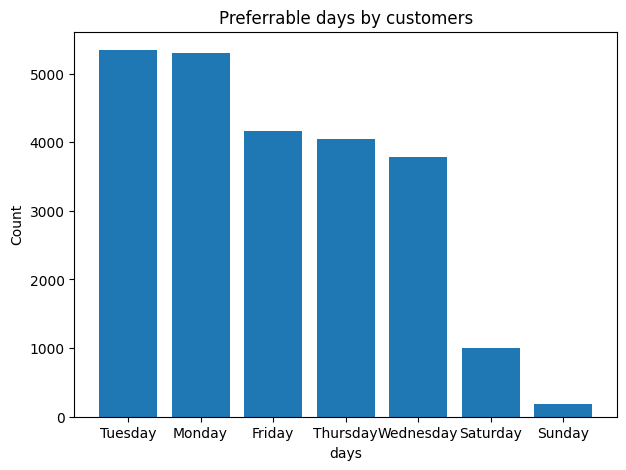

In [1166]:
preferreddays_counts=customerdata['PreferredDeliveryDay'].value_counts()
plt.figure(figsize=(7,5))
plt.bar(preferreddays_counts.index,preferreddays_counts.values)
plt.title('Preferrable days by customers')
plt.xlabel('days')
plt.ylabel('Count')
plt.show()

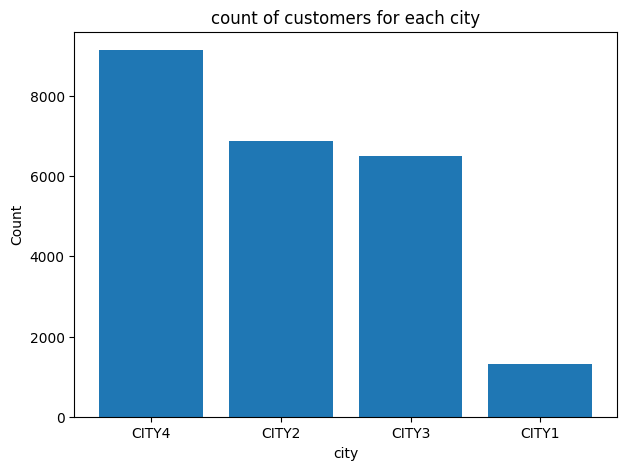

In [1167]:
city_counts=customerdata['City'].value_counts()
plt.figure(figsize=(7,5))
plt.bar(city_counts.index,city_counts.values)
plt.title('count of customers for each city')
plt.xlabel('city')
plt.ylabel('Count')
plt.show()

# Working with train data merging it with customer data

In [1168]:
train_xls=pd.read_excel("/content/drive/MyDrive/DataForPHD/TrainData/Train.xlsx")

In [1169]:
train_xls

CustomerID RetentionPotential
0         C37869                Low
1         C33841                Low
2         C29464                Low
3         C28158                Low
4         C22785               High
...          ...                ...
23815     C14975                Low
23816     C30392                Low
23817     C41735                Low
23818     C26055                Low
23819     C25058               High

[23820 rows x 2 columns]

In [1170]:
train_xls.nunique()

CustomerID            23820
RetentionPotential        3
dtype: int64

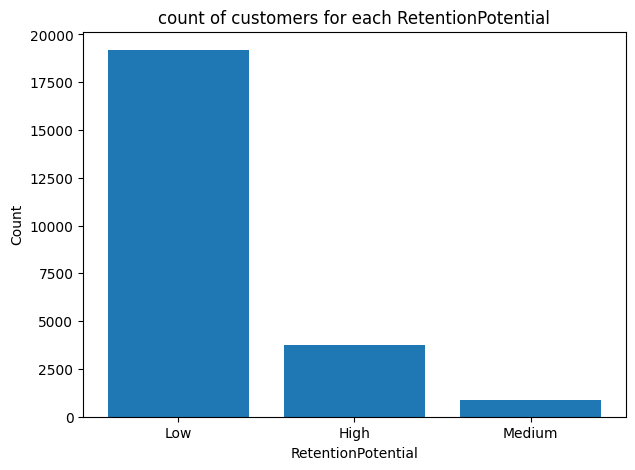

In [1171]:
RetentionPotential_counts=train_xls['RetentionPotential'].value_counts()
plt.figure(figsize=(7,5))
plt.bar(RetentionPotential_counts.index,RetentionPotential_counts.values)
plt.title('count of customers for each RetentionPotential')
plt.xlabel('RetentionPotential')
plt.ylabel('Count')
plt.show()

In [1172]:
data1=pd.merge(customerdata,train_xls,how='outer')
data1

CustomerID   City DateOfRegistration  OnlineCommunication  \
0         C16368  CITY2         2012-09-28                    0   
1         C20345  CITY2         2010-12-19                    1   
2         C17683  CITY2         2010-10-03                    0   
3         C18647  CITY4         2010-11-27                    0   
4         C36692  CITY2         2009-12-04                    1   
...          ...    ...                ...                  ...   
23815     C23511  CITY2         2018-01-17                    1   
23816     C12197  CITY3         2018-01-17                    1   
23817     C40967  CITY3         2018-01-17                    1   
23818     C36140  CITY3         2018-01-17                    1   
23819     C42003  CITY4         2018-01-17                    1   

       AutomaticRefill  DoorstepDelivery PreferredDeliveryDay  \
0                    0                 0               Monday   
1                    1                 1               Friday   
2                    0                 0            Wednesday   
3                    0                 0               Monday   
4                    1                 0               Friday   
...                ...               ...                  ...   
23815                1                 0               Friday   
23816                0                 1               Friday   
23817                0                 0             Saturday   
23818                1                 0             Saturday   
23819                0                 0               Friday   

      RetentionPotential  
0                   High  
1                    Low  
2                 Medium  
3                    Low  
4                    Low  
...                  ...  
23815                Low  
23816                Low  
23817                Low  
23818                Low  
23819                Low  

[23820 rows x 8 columns]

In [1173]:
retention_map = {'High': 3, 'Medium': 2, 'Low': 1}

In [1174]:
data1

CustomerID   City DateOfRegistration  OnlineCommunication  \
0         C16368  CITY2         2012-09-28                    0   
1         C20345  CITY2         2010-12-19                    1   
2         C17683  CITY2         2010-10-03                    0   
3         C18647  CITY4         2010-11-27                    0   
4         C36692  CITY2         2009-12-04                    1   
...          ...    ...                ...                  ...   
23815     C23511  CITY2         2018-01-17                    1   
23816     C12197  CITY3         2018-01-17                    1   
23817     C40967  CITY3         2018-01-17                    1   
23818     C36140  CITY3         2018-01-17                    1   
23819     C42003  CITY4         2018-01-17                    1   

       AutomaticRefill  DoorstepDelivery PreferredDeliveryDay  \
0                    0                 0               Monday   
1                    1                 1               Friday   
2                    0                 0            Wednesday   
3                    0                 0               Monday   
4                    1                 0               Friday   
...                ...               ...                  ...   
23815                1                 0               Friday   
23816                0                 1               Friday   
23817                0                 0             Saturday   
23818                1                 0             Saturday   
23819                0                 0               Friday   

      RetentionPotential  
0                   High  
1                    Low  
2                 Medium  
3                    Low  
4                    Low  
...                  ...  
23815                Low  
23816                Low  
23817                Low  
23818                Low  
23819                Low  

[23820 rows x 8 columns]

In [1175]:
data1['RetentionPotential_num'] = data1['RetentionPotential'].map(retention_map)

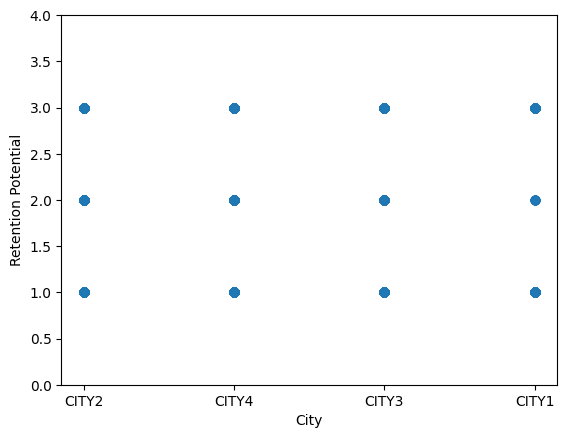

In [1176]:
plt.scatter(data1['City'], data1['RetentionPotential_num'])
plt.xlabel('City')
plt.ylabel('Retention Potential')
plt.ylim(0, 4)
plt.show()

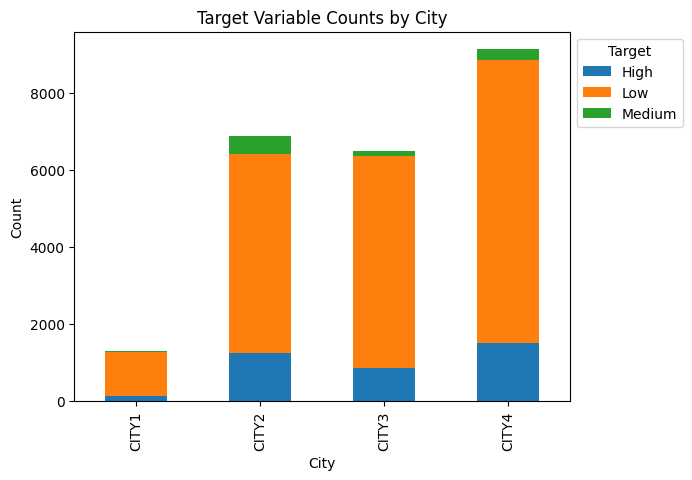

In [1177]:
import matplotlib.pyplot as plt

target_counts_by_city = data1.groupby(['City', 'RetentionPotential']).size().unstack()

# Create a stacked bar chart of the target variable counts by city
target_counts_by_city.plot(kind='bar', stacked=True)
plt.xlabel('City')
plt.ylabel('Count')
plt.title('Target Variable Counts by City')
plt.legend(title='Target', bbox_to_anchor=(1, 1), loc='upper left')
plt.show()

In [1178]:
# encode the City variable using one-hot encoding
one_hot = pd.get_dummies(data1['City'], prefix='City')
data1 = pd.concat([data1, one_hot], axis=1)

data1


CustomerID   City DateOfRegistration  OnlineCommunication  \
0         C16368  CITY2         2012-09-28                    0   
1         C20345  CITY2         2010-12-19                    1   
2         C17683  CITY2         2010-10-03                    0   
3         C18647  CITY4         2010-11-27                    0   
4         C36692  CITY2         2009-12-04                    1   
...          ...    ...                ...                  ...   
23815     C23511  CITY2         2018-01-17                    1   
23816     C12197  CITY3         2018-01-17                    1   
23817     C40967  CITY3         2018-01-17                    1   
23818     C36140  CITY3         2018-01-17                    1   
23819     C42003  CITY4         2018-01-17                    1   

       AutomaticRefill  DoorstepDelivery PreferredDeliveryDay  \
0                    0                 0               Monday   
1                    1                 1               Friday   
2                    0                 0            Wednesday   
3                    0                 0               Monday   
4                    1                 0               Friday   
...                ...               ...                  ...   
23815                1                 0               Friday   
23816                0                 1               Friday   
23817                0                 0             Saturday   
23818                1                 0             Saturday   
23819                0                 0               Friday   

      RetentionPotential  RetentionPotential_num  City_CITY1  City_CITY2  \
0                   High                       3           0           1   
1                    Low                       1           0           1   
2                 Medium                       2           0           1   
3                    Low                       1           0           0   
4                    Low                       1           0           1   
...                  ...                     ...         ...         ...   
23815                Low                       1           0           1   
23816                Low                       1           0           0   
23817                Low                       1           0           0   
23818                Low                       1           0           0   
23819                Low                       1           0           0   

       City_CITY3  City_CITY4  
0               0           0  
1               0           0  
2               0           0  
3               0           1  
4               0           0  
...           ...         ...  
23815           0           0  
23816           1           0  
23817           1           0  
23818           1           0  
23819           0           1  

[23820 rows x 13 columns]

# Working with Transaction data

In [1179]:
transaction_data=pd.read_excel("/content/drive/MyDrive/DataForPHD/TrainData/transactionsdata_Train.xlsx")
transaction_data.columns=['CustomerID','DateofOrder','timestamp_of_order','OrderQuantity']

In [1180]:
transaction_data

CustomerID DateofOrder timestamp_of_order  OrderQuantity
0          C16368  2013-08-11           15:17:52             15
1          C20345  2011-04-01           19:50:00             92
2          C20345  2012-06-29           15:11:56             95
3          C20345  2012-09-22           20:49:10             74
4          C20345  2011-08-23           11:50:26             81
...           ...         ...                ...            ...
104750     C12197  2018-01-17           14:35:40             56
104751     C40967  2018-01-17           17:15:20             35
104752     C36140  2018-01-17           13:12:54             47
104753     C36140  2018-01-21           21:12:52             53
104754     C42003  2018-01-17           16:34:46             41

[104755 rows x 4 columns]

In [1181]:
transaction_data.duplicated().sum()

0

In [1182]:
transaction_data.nunique()

CustomerID            23820
DateofOrder            3151
timestamp_of_order    21399
OrderQuantity           451
dtype: int64

In [1183]:
transaction_data['CustomerID'].value_counts()

C25557    257
C33945    230
C35549    229
C16734    190
C16810    188
         ... 
C39166      1
C12381      1
C37899      1
C21430      1
C42003      1
Name: CustomerID, Length: 23820, dtype: int64

In [1184]:
customer_row = transaction_data.loc[transaction_data['CustomerID'] == 'C25557']
customer_row

CustomerID DateofOrder timestamp_of_order  OrderQuantity
89052     C25557  2014-01-25           21:49:38             81
89053     C25557  2014-09-20           12:09:30             65
89054     C25557  2014-03-15           17:04:36             87
89055     C25557  2014-03-25           19:59:22             61
89056     C25557  2016-01-24           21:59:00             57
...          ...         ...                ...            ...
89304     C25557  2015-08-01           14:07:18             79
89305     C25557  2016-07-04           12:47:20             72
89306     C25557  2015-08-17           11:03:14             50
89307     C25557  2015-10-13           21:58:44             51
89308     C25557  2017-01-08           17:21:32             61

[257 rows x 4 columns]

In [1185]:
transaction_data['DateofOrder'] = pd.to_datetime(transaction_data['DateofOrder'])

In [1186]:
transaction_data['Year'] = transaction_data['DateofOrder'].dt.year

In [1187]:
yearly_quantity = transaction_data.groupby('Year')['OrderQuantity'].sum()

In [1188]:
yearly_quantity 

Year
2008       1237
2009      35371
2010     276890
2011    1287628
2012    1812969
2013    3186085
2014     328548
2015     328761
2016     447635
2017     739904
2018      73550
Name: OrderQuantity, dtype: int64

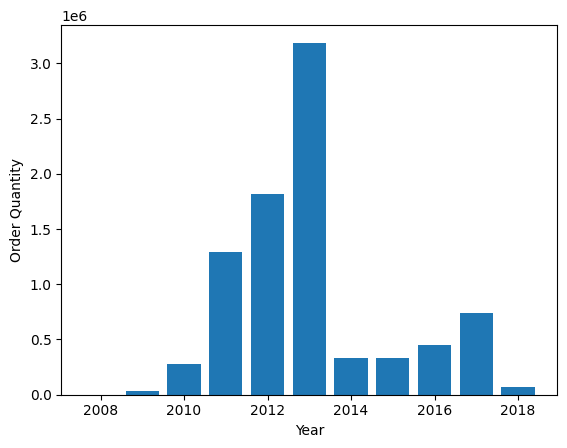

In [1189]:
plt.bar(yearly_quantity.index, yearly_quantity.values)
plt.xlabel('Year')
plt.ylabel('Order Quantity')
plt.show()

In [1190]:
transaction_data['timestamp_of_order'] = pd.to_datetime(transaction_data['timestamp_of_order'], format='%H:%M:%S')

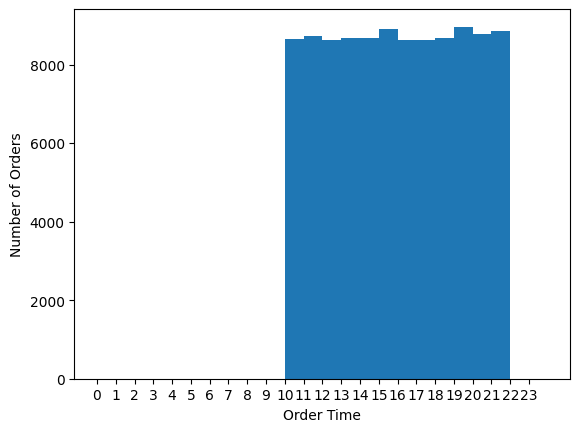

In [1191]:
plt.hist(transaction_data['timestamp_of_order'], bins=24, range=(pd.Timestamp('1900-01-01 00:00:00'), pd.Timestamp('1900-01-02 00:00:00')))

# set the x and y labels
plt.xlabel('Order Time')
plt.ylabel('Number of Orders')

# set the x-axis tick labels to show the hour of the day
plt.xticks([pd.Timestamp('1900-01-01 {0}:00:00'.format(hour)) for hour in range(0, 24)], [str(hour) for hour in range(0, 24)])

# show the plot
plt.show()

In [1192]:
trans=transaction_data.drop(['timestamp_of_order','Year'],axis=1)

In [1193]:
trans

CustomerID DateofOrder  OrderQuantity
0          C16368  2013-08-11             15
1          C20345  2011-04-01             92
2          C20345  2012-06-29             95
3          C20345  2012-09-22             74
4          C20345  2011-08-23             81
...           ...         ...            ...
104750     C12197  2018-01-17             56
104751     C40967  2018-01-17             35
104752     C36140  2018-01-17             47
104753     C36140  2018-01-21             53
104754     C42003  2018-01-17             41

[104755 rows x 3 columns]

In [1194]:
first_order_dates = trans.groupby('CustomerID')['DateofOrder'].min()
pd.DataFrame(first_order_dates)
first_order_dates = first_order_dates.reset_index()
first_order_dates = first_order_dates.rename(columns={'index': 'CustomerID'})
first_order_dates

CustomerID DateofOrder
0         C12116  2013-10-03
1         C12117  2013-12-05
2         C12118  2013-09-10
3         C12119  2013-10-22
4         C12120  2014-01-10
...          ...         ...
23815     C42185  2011-04-04
23816     C42186  2013-11-23
23817     C42187  2013-09-15
23818     C42188  2011-10-04
23819     C42189  2013-05-09

[23820 rows x 2 columns]

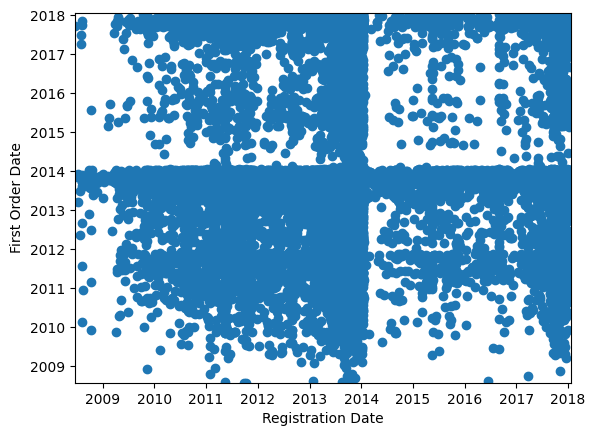

In [1195]:
# create a scatter plot
plt.scatter(customerdata['DateOfRegistration'],first_order_dates['DateofOrder'])

# set the x and y labels
plt.xlabel('Registration Date')
plt.ylabel('First Order Date')

# set the x-axis and y-axis limits to show all dates
plt.xlim(customerdata['DateOfRegistration'].min() - pd.DateOffset(days=1), customerdata['DateOfRegistration'].max() + pd.DateOffset(days=1))
plt.ylim(first_order_dates['DateofOrder'].min() - pd.DateOffset(days=1), first_order_dates['DateofOrder'].max() + pd.DateOffset(days=1))

# show the plot
plt.show()


#If your scatter plot is divided into four boxes inside and the division is at 2014, it suggests that there may be a difference in customer behavior or business performance before and after 2014. 
#If most of the points in all four boxes of your scatter plot are towards the upper right, it suggests that customers are staying with your business for a long time before making their first order. This is a positive trend as it indicates a high level of customer loyalty and engagement.
#If there are more points towards the left side of the plot in the two boxes, and the number of points has reduced over time, it suggests that customers are taking longer to make their first order, or there may be fewer new customers registering over time.

In [1196]:
transactiondata=trans.groupby('CustomerID').agg({'OrderQuantity':'sum','DateofOrder':'min'}).reset_index()

In [1197]:
transactiondata

CustomerID  OrderQuantity DateofOrder
0         C12116            115  2013-10-03
1         C12117             41  2013-12-05
2         C12118             41  2013-09-10
3         C12119             52  2013-10-22
4         C12120             31  2014-01-10
...          ...            ...         ...
23815     C42185           1340  2011-04-04
23816     C42186             46  2013-11-23
23817     C42187             41  2013-09-15
23818     C42188             51  2011-10-04
23819     C42189            180  2013-05-09

[23820 rows x 3 columns]

In [1198]:
data2=pd.merge(data1,transactiondata,how='outer')

In [1199]:
data2

CustomerID   City DateOfRegistration  OnlineCommunication  \
0         C16368  CITY2         2012-09-28                    0   
1         C20345  CITY2         2010-12-19                    1   
2         C17683  CITY2         2010-10-03                    0   
3         C18647  CITY4         2010-11-27                    0   
4         C36692  CITY2         2009-12-04                    1   
...          ...    ...                ...                  ...   
23815     C23511  CITY2         2018-01-17                    1   
23816     C12197  CITY3         2018-01-17                    1   
23817     C40967  CITY3         2018-01-17                    1   
23818     C36140  CITY3         2018-01-17                    1   
23819     C42003  CITY4         2018-01-17                    1   

       AutomaticRefill  DoorstepDelivery PreferredDeliveryDay  \
0                    0                 0               Monday   
1                    1                 1               Friday   
2                    0                 0            Wednesday   
3                    0                 0               Monday   
4                    1                 0               Friday   
...                ...               ...                  ...   
23815                1                 0               Friday   
23816                0                 1               Friday   
23817                0                 0             Saturday   
23818                1                 0             Saturday   
23819                0                 0               Friday   

      RetentionPotential  RetentionPotential_num  City_CITY1  City_CITY2  \
0                   High                       3           0           1   
1                    Low                       1           0           1   
2                 Medium                       2           0           1   
3                    Low                       1           0           0   
4                    Low                       1           0           1   
...                  ...                     ...         ...         ...   
23815                Low                       1           0           1   
23816                Low                       1           0           0   
23817                Low                       1           0           0   
23818                Low                       1           0           0   
23819                Low                       1           0           0   

       City_CITY3  City_CITY4  OrderQuantity DateofOrder  
0               0           0             15  2013-08-11  
1               0           0          15614  2011-04-01  
2               0           0            443  2010-12-01  
3               0           1            748  2010-11-29  
4               0           0           2350  2011-09-21  
...           ...         ...            ...         ...  
23815           0           0             41  2018-01-17  
23816           1           0             56  2018-01-17  
23817           1           0             35  2018-01-17  
23818           1           0            100  2018-01-17  
23819           0           1             41  2018-01-17  

[23820 rows x 15 columns]

In [1200]:
lastorder=trans.groupby('CustomerID').agg({'DateofOrder':'max'}).reset_index()
lastorder.columns=['CustomerID','lastorder']

In [1201]:
data2=pd.merge(data2,lastorder,how='outer')
data2

CustomerID   City DateOfRegistration  OnlineCommunication  \
0         C16368  CITY2         2012-09-28                    0   
1         C20345  CITY2         2010-12-19                    1   
2         C17683  CITY2         2010-10-03                    0   
3         C18647  CITY4         2010-11-27                    0   
4         C36692  CITY2         2009-12-04                    1   
...          ...    ...                ...                  ...   
23815     C23511  CITY2         2018-01-17                    1   
23816     C12197  CITY3         2018-01-17                    1   
23817     C40967  CITY3         2018-01-17                    1   
23818     C36140  CITY3         2018-01-17                    1   
23819     C42003  CITY4         2018-01-17                    1   

       AutomaticRefill  DoorstepDelivery PreferredDeliveryDay  \
0                    0                 0               Monday   
1                    1                 1               Friday   
2                    0                 0            Wednesday   
3                    0                 0               Monday   
4                    1                 0               Friday   
...                ...               ...                  ...   
23815                1                 0               Friday   
23816                0                 1               Friday   
23817                0                 0             Saturday   
23818                1                 0             Saturday   
23819                0                 0               Friday   

      RetentionPotential  RetentionPotential_num  City_CITY1  City_CITY2  \
0                   High                       3           0           1   
1                    Low                       1           0           1   
2                 Medium                       2           0           1   
3                    Low                       1           0           0   
4                    Low                       1           0           1   
...                  ...                     ...         ...         ...   
23815                Low                       1           0           1   
23816                Low                       1           0           0   
23817                Low                       1           0           0   
23818                Low                       1           0           0   
23819                Low                       1           0           0   

       City_CITY3  City_CITY4  OrderQuantity DateofOrder  lastorder  
0               0           0             15  2013-08-11 2013-08-11  
1               0           0          15614  2011-04-01 2014-01-19  
2               0           0            443  2010-12-01 2011-07-06  
3               0           1            748  2010-11-29 2013-01-28  
4               0           0           2350  2011-09-21 2014-01-16  
...           ...         ...            ...         ...        ...  
23815           0           0             41  2018-01-17 2018-01-17  
23816           1           0             56  2018-01-17 2018-01-17  
23817           1           0             35  2018-01-17 2018-01-17  
23818           1           0            100  2018-01-17 2018-01-21  
23819           0           1             41  2018-01-17 2018-01-17  

[23820 rows x 16 columns]

In [1202]:
current_date = pd.to_datetime('today').normalize()
data2['days b/w R&F']= (data2['DateofOrder'] - data2['DateOfRegistration']).dt.days
data2['DaysSinceRegistration']= (current_date - data2['DateOfRegistration']).dt.days
data2['DaysSinceLastOrder'] = (current_date - data2['lastorder']).dt.days
data2['Days b/w F&L']= (data2['lastorder'] - data2['DateofOrder']).dt.days

In [1203]:
data2

CustomerID   City DateOfRegistration  OnlineCommunication  \
0         C16368  CITY2         2012-09-28                    0   
1         C20345  CITY2         2010-12-19                    1   
2         C17683  CITY2         2010-10-03                    0   
3         C18647  CITY4         2010-11-27                    0   
4         C36692  CITY2         2009-12-04                    1   
...          ...    ...                ...                  ...   
23815     C23511  CITY2         2018-01-17                    1   
23816     C12197  CITY3         2018-01-17                    1   
23817     C40967  CITY3         2018-01-17                    1   
23818     C36140  CITY3         2018-01-17                    1   
23819     C42003  CITY4         2018-01-17                    1   

       AutomaticRefill  DoorstepDelivery PreferredDeliveryDay  \
0                    0                 0               Monday   
1                    1                 1               Friday   
2                    0                 0            Wednesday   
3                    0                 0               Monday   
4                    1                 0               Friday   
...                ...               ...                  ...   
23815                1                 0               Friday   
23816                0                 1               Friday   
23817                0                 0             Saturday   
23818                1                 0             Saturday   
23819                0                 0               Friday   

      RetentionPotential  RetentionPotential_num  City_CITY1  City_CITY2  \
0                   High                       3           0           1   
1                    Low                       1           0           1   
2                 Medium                       2           0           1   
3                    Low                       1           0           0   
4                    Low                       1           0           1   
...                  ...                     ...         ...         ...   
23815                Low                       1           0           1   
23816                Low                       1           0           0   
23817                Low                       1           0           0   
23818                Low                       1           0           0   
23819                Low                       1           0           0   

       City_CITY3  City_CITY4  OrderQuantity DateofOrder  lastorder  \
0               0           0             15  2013-08-11 2013-08-11   
1               0           0          15614  2011-04-01 2014-01-19   
2               0           0            443  2010-12-01 2011-07-06   
3               0           1            748  2010-11-29 2013-01-28   
4               0           0           2350  2011-09-21 2014-01-16   
...           ...         ...            ...         ...        ...   
23815           0           0             41  2018-01-17 2018-01-17   
23816           1           0             56  2018-01-17 2018-01-17   
23817           1           0             35  2018-01-17 2018-01-17   
23818           1           0            100  2018-01-17 2018-01-21   
23819           0           1             41  2018-01-17 2018-01-17   

       days b/w R&F  DaysSinceRegistration  DaysSinceLastOrder  Days b/w F&L  
0               317                   3843                3526             0  
1               103                   4492                3365          1024  
2                59                   4569                4293           217  
3                 2                   4514                3721           791  
4               656                   4872                3368           848  
...             ...                    ...                 ...           ...  
23815             0                   1906                1906             0  
23816             0   

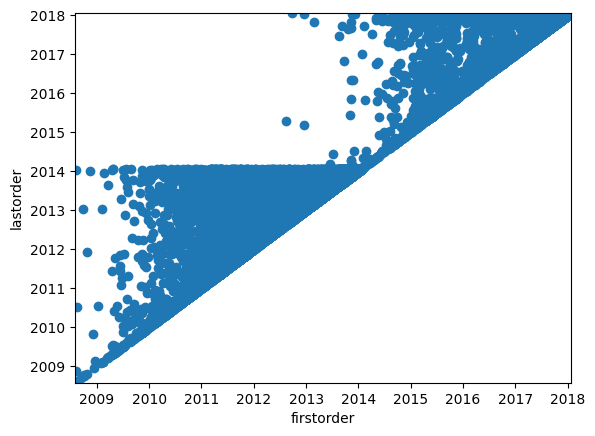

In [1204]:
# create a scatter plot
plt.scatter(data2['DateofOrder'],data2['lastorder'])

# set the x and y labels
plt.xlabel('firstorder')
plt.ylabel('lastorder')

# set the x-axis and y-axis limits to show all dates
plt.xlim(data2['DateofOrder'].min() - pd.DateOffset(days=1), data2['DateofOrder'].max() + pd.DateOffset(days=1))
plt.ylim(data2['lastorder'].min() - pd.DateOffset(days=1), data2['lastorder'].max() + pd.DateOffset(days=1))

# show the plot
plt.show()



#If most of the points in your scatter plot fall in the upper left triangle, it suggests that customers tend to place their last order relatively soon after their first order, which could indicate that they are not staying engaged with your business over time.

In [1205]:
data2=data2.drop(['DateOfRegistration','DateofOrder','lastorder'],axis=1)

In [1206]:
data2

CustomerID   City  OnlineCommunication  AutomaticRefill  \
0         C16368  CITY2                    0                0   
1         C20345  CITY2                    1                1   
2         C17683  CITY2                    0                0   
3         C18647  CITY4                    0                0   
4         C36692  CITY2                    1                1   
...          ...    ...                  ...              ...   
23815     C23511  CITY2                    1                1   
23816     C12197  CITY3                    1                0   
23817     C40967  CITY3                    1                0   
23818     C36140  CITY3                    1                1   
23819     C42003  CITY4                    1                0   

       DoorstepDelivery PreferredDeliveryDay RetentionPotential  \
0                     0               Monday               High   
1                     1               Friday                Low   
2                     0            Wednesday             Medium   
3                     0               Monday                Low   
4                     0               Friday                Low   
...                 ...                  ...                ...   
23815                 0               Friday                Low   
23816                 1               Friday                Low   
23817                 0             Saturday                Low   
23818                 0             Saturday                Low   
23819                 0               Friday                Low   

       RetentionPotential_num  City_CITY1  City_CITY2  City_CITY3  City_CITY4  \
0                           3           0           1           0           0   
1                           1           0           1           0           0   
2                           2           0           1           0           0   
3                           1           0           0           0           1   
4                           1           0           1           0           0   
...                       ...         ...         ...         ...         ...   
23815                       1           0           1           0           0   
23816                       1           0           0           1           0   
23817                       1           0           0           1           0   
23818                       1           0           0           1           0   
23819                       1           0           0           0           1   

       OrderQuantity  days b/w R&F  DaysSinceRegistration  DaysSinceLastOrder  \
0                 15           317                   3843                3526   
1              15614           103                   4492                3365   
2                443            59                   4569                4293   
3                748             2                   4514                3721   
4               2350           656                   4872                3368   
...              ...           ...                    ...                 ...   
23815             41             0                   1906                1906   
23816             56             0                   1906                1906   
23817             35             0                   1906                1906   
23818            100             0                   1906                1902   
23819             41             0                   1906                1906   

       Days b/w F&L  
0                 0  
1              1024  
2               217  
3               791  
4               848  
...             ...  
23815             0  
23816             0  
23817             0  
23818             4  
23819             0  

[23820 rows x 17 columns]

{'whiskers': [<matplotlib.lines.Line2D at 0x7f1b996cfa90>,
 'caps': [<matplotlib.lines.Line2D at 0x7f1b99995a90>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f1b996cf8e0>,
 'medians': [<matplotlib.lines.Line2D at 0x7f1b9990d730>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f1be9f0fca0>,
 'means': []}

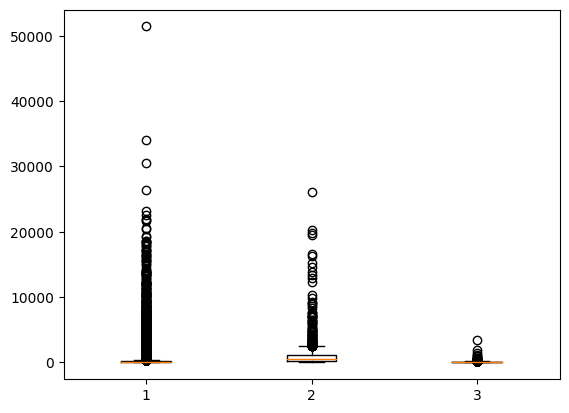

In [1207]:
order_by_retention = data2.groupby('RetentionPotential_num')['OrderQuantity'].apply(list)
plt.boxplot(order_by_retention.values)

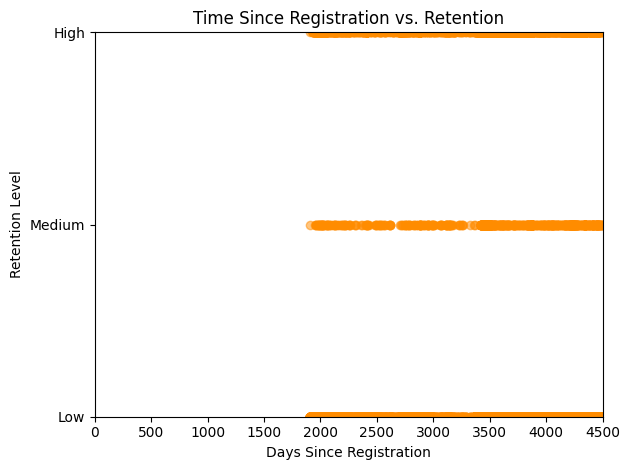

In [1208]:
# Create a scatter plot of time since registration vs. retention level
plt.scatter(data2['DaysSinceRegistration'], data2['RetentionPotential_num'], color='darkorange', alpha=0.5)
plt.title('Time Since Registration vs. Retention')
plt.xlabel('Days Since Registration')
plt.ylabel('Retention Level')
plt.xlim(0, 3600)
plt.ylim(1, 3)
plt.xticks([0, 500, 1000, 1500, 2000, 2500, 3000, 3500, 4000,4500])
plt.yticks([1, 2, 3], ['Low', 'Medium', 'High'])
plt.tight_layout()
plt.show()


In [1209]:
data2['DaysSinceRegistration'].max()

5407

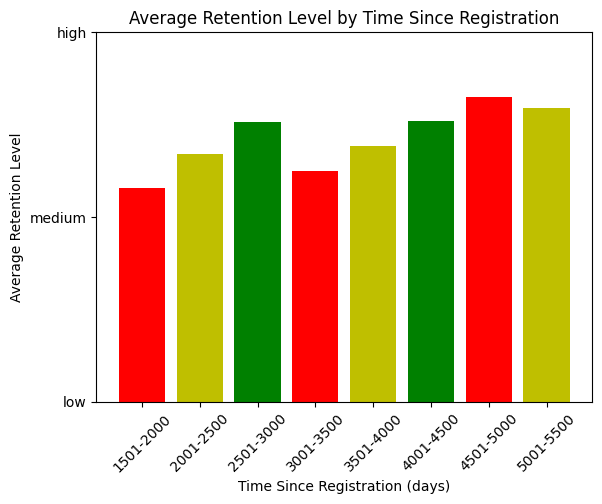

In [1210]:
# Convert time since registration to categorical variable based on intervals
data2['DaysSinceRegistrationcat'] = pd.cut(data2['DaysSinceRegistration'], bins=[0,500,1000,1500,2000,2500,3000,3500,4000,4500,5000,5500,6000,6500,7000], labels=['0-500', '501-1000', '1001-1500', '1501-2000','2001-2500','2501-3000','3001-3500','3501-4000','4001-4500','4501-5000','5001-5500','5501-6000','6001-6500','6501-7000'])

# Calculate average retention level for each time interval
avg_retention = data2.groupby('DaysSinceRegistrationcat')['RetentionPotential_num'].mean()

# Define the order of the retention levels
retention_order = ['low', 'medium', 'high']

# Plot the bar chart
plt.bar(avg_retention.index, avg_retention.values, color=['r', 'y', 'g'], align='center')
plt.xlabel('Time Since Registration (days)')
plt.ylabel('Average Retention Level')
plt.title('Average Retention Level by Time Since Registration')
plt.xticks(rotation=45)
plt.yticks([0, 1, 2], retention_order)
plt.show()

In [1211]:
data2['DaysSinceLastOrder'].max()

5365

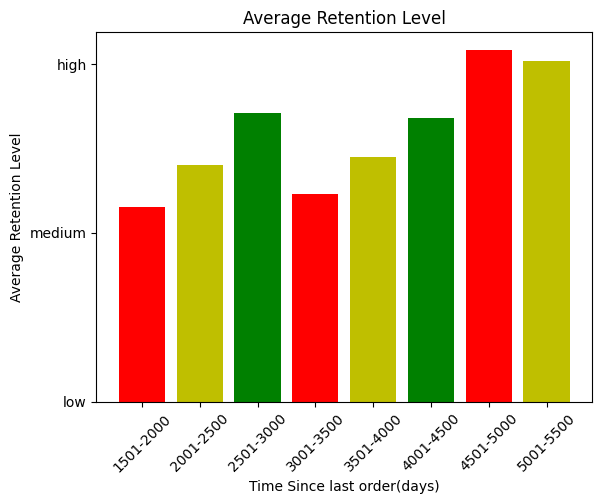

In [1212]:
data2['DaysSincelastordercat'] = pd.cut(data2['DaysSinceLastOrder'],bins=[0,500,1000,1500,2000,2500,3000,3500,4000,4500,5000,5500,6000],  labels=['0-500', '501-1000', '1001-1500', '1501-2000','2001-2500','2501-3000','3001-3500','3501-4000','4001-4500','4501-5000','5001-5500','5501-6000'])


# Calculate average retention level for each time interval
avg_retention = data2.groupby('DaysSincelastordercat')['RetentionPotential_num'].mean()

# Define the order of the retention levels
retention_order = ['low', 'medium', 'high']

# Plot the bar chart
plt.bar(avg_retention.index, avg_retention.values, color=['r', 'y', 'g'], align='center')
plt.xlabel('Time Since last order(days)')
plt.ylabel('Average Retention Level')
plt.title('Average Retention Level')
plt.xticks(rotation=45)
plt.yticks([0, 1, 2], retention_order)
plt.show()

In [1213]:
data2=data2.drop(['DaysSinceRegistrationcat','DaysSincelastordercat'],axis=1)

# Working with Email data

In [1214]:
emaildata=pd.read_excel("/content/drive/MyDrive/DataForPHD/TrainData/Emaildata_Train.xlsx")
emaildata.columns=['CustomerID','Dateofemail','EmailType','timestamp_of_sent','MailOpened','MailClicked']

In [1215]:
emaildata

CustomerID Dateofemail        EmailType timestamp_of_sent MailOpened  \
0          C16368  2012-09-28     WelcomeEmail          15:56:50        yes   
1          C20345  2010-12-19     WelcomeEmail          15:10:30        yes   
2          C17683  2010-10-03     WelcomeEmail          17:12:24        yes   
3          C18647  2010-11-27     WelcomeEmail          16:59:02        yes   
4          C36692  2009-12-04     WelcomeEmail          17:27:22        yes   
...           ...         ...              ...               ...        ...   
517667     C36140  2018-01-18  CustomizedEmail          14:04:44        yes   
517668     C36140  2018-01-21  CustomizedEmail          16:17:16         no   
517669     C36140  2018-01-20  CustomizedEmail          12:17:34        yes   
517670     C36140  2018-01-20  CustomizedEmail          16:31:18        yes   
517671     C36140  2018-01-21  CustomizedEmail          14:23:16        yes   

          MailClicked  
0       NotApplicable  
1       NotApplicable  
2       NotApplicable  
3       NotApplicable  
4       NotApplicable  
...               ...  
517667            yes  
517668             no  
517669            yes  
517670             no  
517671            yes  

[517672 rows x 6 columns]

In [1216]:
emaildata.nunique()

CustomerID           23820
Dateofemail           3382
EmailType                2
timestamp_of_sent    14369
MailOpened               2
MailClicked              3
dtype: int64

In [1217]:
emaildata['EmailType'].value_counts()

CustomizedEmail    493852
WelcomeEmail        23820
Name: EmailType, dtype: int64

In [1218]:
emaildata['MailClicked'].value_counts()

no               466011
yes               27841
NotApplicable     23820
Name: MailClicked, dtype: int64

In [1219]:
grouped=emaildata.groupby(['CustomerID','EmailType']).size().reset_index(name='count')
grouped

CustomerID        EmailType  count
0         C12116  CustomizedEmail     31
1         C12116     WelcomeEmail      1
2         C12117     WelcomeEmail      1
3         C12118     WelcomeEmail      1
4         C12119  CustomizedEmail     41
...          ...              ...    ...
37926     C42186     WelcomeEmail      1
37927     C42187     WelcomeEmail      1
37928     C42188     WelcomeEmail      1
37929     C42189  CustomizedEmail     50
37930     C42189     WelcomeEmail      1

[37931 rows x 3 columns]

In [1220]:
pivot = pd.pivot_table(grouped, index='CustomerID', columns='EmailType', values='count').reset_index()
pivot.columns.name=None

In [1221]:
pivot.columns=['CustomerID','Customizedemailcount','Welcomeemailcount']
pivot

CustomerID  Customizedemailcount  Welcomeemailcount
0         C12116                  31.0                1.0
1         C12117                   NaN                1.0
2         C12118                   NaN                1.0
3         C12119                  41.0                1.0
4         C12120                   NaN                1.0
...          ...                   ...                ...
23815     C42185                  43.0                1.0
23816     C42186                   NaN                1.0
23817     C42187                   NaN                1.0
23818     C42188                   NaN                1.0
23819     C42189                  50.0                1.0

[23820 rows x 3 columns]

In [1222]:
pivot=pivot.drop('Welcomeemailcount',axis=1)

In [1223]:
pivot.fillna(0,inplace=True)

In [1224]:
pivot['Customizedemailcount']=pivot['Customizedemailcount'].astype('int64')

In [1225]:
pivot=pd.DataFrame(pivot)
pivot

CustomerID  Customizedemailcount
0         C12116                    31
1         C12117                     0
2         C12118                     0
3         C12119                    41
4         C12120                     0
...          ...                   ...
23815     C42185                    43
23816     C42186                     0
23817     C42187                     0
23818     C42188                     0
23819     C42189                    50

[23820 rows x 2 columns]

In [1226]:
emaildata['timestamp_of_sent'] = pd.to_datetime(emaildata['timestamp_of_sent'], format='%H:%M:%S')

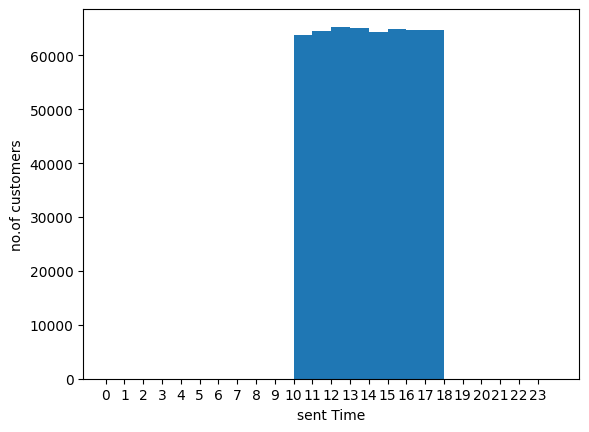

In [1227]:
plt.hist(emaildata['timestamp_of_sent'], bins=24, range=(pd.Timestamp('1900-01-01 00:00:00'), pd.Timestamp('1900-01-02 00:00:00')))

# set the x and y labels
plt.xlabel('sent Time')
plt.ylabel('no.of customers')

# set the x-axis tick labels to show the hour of the day
plt.xticks([pd.Timestamp('1900-01-01 {0}:00:00'.format(hour)) for hour in range(0, 24)], [str(hour) for hour in range(0, 24)])

# show the plot
plt.show()

In [1228]:
df=emaildata.drop('timestamp_of_sent',axis=1)

In [1229]:
df.isnull().sum()

CustomerID     0
Dateofemail    0
EmailType      0
MailOpened     0
MailClicked    0
dtype: int64

In [1230]:
df['Dateofemail'] = pd.to_datetime(df['Dateofemail'])

In [1231]:
firstemail=df.groupby('CustomerID').agg({'Dateofemail':'min'}).reset_index()
firstemail.columns=['CustomerID','firstemail']
firstemail

CustomerID firstemail
0         C12116 2013-09-23
1         C12117 2013-12-05
2         C12118 2013-09-10
3         C12119 2013-04-13
4         C12120 2014-01-10
...          ...        ...
23815     C42185 2011-03-03
23816     C42186 2013-11-23
23817     C42187 2013-09-15
23818     C42188 2011-10-04
23819     C42189 2013-01-17

[23820 rows x 2 columns]

In [1232]:
lastemail=df.groupby('CustomerID').agg({'Dateofemail':'max'}).reset_index()
lastemail.columns=['CustomerID','lastemail']
lastemail

CustomerID  lastemail
0         C12116 2013-10-09
1         C12117 2013-12-05
2         C12118 2013-09-10
3         C12119 2013-10-21
4         C12120 2014-01-10
...          ...        ...
23815     C42185 2011-12-30
23816     C42186 2013-11-23
23817     C42187 2013-09-15
23818     C42188 2011-10-04
23819     C42189 2013-11-05

[23820 rows x 2 columns]

In [1233]:
grouped=emaildata.groupby(['CustomerID','MailOpened']).size().reset_index(name='count')
grouped

CustomerID MailOpened  count
0         C12116         no     27
1         C12116        yes      5
2         C12117        yes      1
3         C12118        yes      1
4         C12119         no     28
...          ...        ...    ...
37436     C42186        yes      1
37437     C42187        yes      1
37438     C42188        yes      1
37439     C42189         no     32
37440     C42189        yes     19

[37441 rows x 3 columns]

In [1234]:
pivot_for_mailopened = pd.pivot_table(grouped, index='CustomerID', columns='MailOpened', values='count').reset_index()
pivot_for_mailopened.columns.name=None

In [1235]:
pivot_for_mailopened.columns=['CustomerID','opened-yes','opened-no']
pivot_for_mailopened

CustomerID  opened-yes  opened-no
0         C12116        27.0        5.0
1         C12117         NaN        1.0
2         C12118         NaN        1.0
3         C12119        28.0       14.0
4         C12120         NaN        1.0
...          ...         ...        ...
23815     C42185        34.0       10.0
23816     C42186         NaN        1.0
23817     C42187         NaN        1.0
23818     C42188         NaN        1.0
23819     C42189        32.0       19.0

[23820 rows x 3 columns]

In [1236]:
pivot_for_mailopened['opened-yes']=pivot_for_mailopened['opened-yes'].fillna(0)

In [1237]:
pivot_for_mailopened[['opened-yes','opened-no']]=pivot_for_mailopened[['opened-yes','opened-no']].astype('int64')

In [1238]:
pivot_for_mailopened

CustomerID  opened-yes  opened-no
0         C12116          27          5
1         C12117           0          1
2         C12118           0          1
3         C12119          28         14
4         C12120           0          1
...          ...         ...        ...
23815     C42185          34         10
23816     C42186           0          1
23817     C42187           0          1
23818     C42188           0          1
23819     C42189          32         19

[23820 rows x 3 columns]

In [1239]:
grouped=emaildata.groupby(['CustomerID','MailClicked']).size().reset_index(name='count')
grouped

CustomerID    MailClicked  count
0         C12116  NotApplicable      1
1         C12116             no     29
2         C12116            yes      2
3         C12117  NotApplicable      1
4         C12118  NotApplicable      1
...          ...            ...    ...
46519     C42186  NotApplicable      1
46520     C42187  NotApplicable      1
46521     C42188  NotApplicable      1
46522     C42189  NotApplicable      1
46523     C42189             no     50

[46524 rows x 3 columns]

In [1240]:
pivot_for_mailclicked = pd.pivot_table(grouped, index='CustomerID', columns='MailClicked', values='count').reset_index()
pivot_for_mailclicked.columns.name=None

In [1241]:
pivot_for_mailclicked

CustomerID  NotApplicable    no  yes
0         C12116            1.0  29.0  2.0
1         C12117            1.0   NaN  NaN
2         C12118            1.0   NaN  NaN
3         C12119            1.0  37.0  4.0
4         C12120            1.0   NaN  NaN
...          ...            ...   ...  ...
23815     C42185            1.0  43.0  NaN
23816     C42186            1.0   NaN  NaN
23817     C42187            1.0   NaN  NaN
23818     C42188            1.0   NaN  NaN
23819     C42189            1.0  50.0  NaN

[23820 rows x 4 columns]

In [1242]:
pivot_for_mailclicked.columns=['CustomerID','Notapplicable','clicked-yes','clicked-no']
pivot_for_mailclicked

CustomerID  Notapplicable  clicked-yes  clicked-no
0         C12116            1.0         29.0         2.0
1         C12117            1.0          NaN         NaN
2         C12118            1.0          NaN         NaN
3         C12119            1.0         37.0         4.0
4         C12120            1.0          NaN         NaN
...          ...            ...          ...         ...
23815     C42185            1.0         43.0         NaN
23816     C42186            1.0          NaN         NaN
23817     C42187            1.0          NaN         NaN
23818     C42188            1.0          NaN         NaN
23819     C42189            1.0         50.0         NaN

[23820 rows x 4 columns]

In [1243]:
pivot_for_mailclicked[['Notapplicable','clicked-yes','clicked-no']]=pivot_for_mailclicked[['Notapplicable','clicked-yes','clicked-no']].fillna(0)

In [1244]:
pivot_for_mailclicked[['Notapplicable','clicked-yes','clicked-no']]=pivot_for_mailclicked[['Notapplicable','clicked-yes','clicked-no']].astype('int64')

In [1245]:
pivot_for_mailclicked

CustomerID  Notapplicable  clicked-yes  clicked-no
0         C12116              1           29           2
1         C12117              1            0           0
2         C12118              1            0           0
3         C12119              1           37           4
4         C12120              1            0           0
...          ...            ...          ...         ...
23815     C42185              1           43           0
23816     C42186              1            0           0
23817     C42187              1            0           0
23818     C42188              1            0           0
23819     C42189              1           50           0

[23820 rows x 4 columns]

In [1246]:
pivot_for_mailclicked2=pivot_for_mailclicked.drop('Notapplicable',axis=1)

In [1247]:
email_data=pd.merge(pivot,firstemail,how='outer')

In [1248]:
email_data=pd.merge(email_data,lastemail,how='outer')

In [1249]:
email_data=pd.merge(email_data,pivot,how='outer')

In [1250]:
email_data=pd.merge(email_data,pivot_for_mailopened,how='outer')

In [1251]:
email_data=pd.merge(email_data,pivot_for_mailclicked2,how='outer')
email_data

CustomerID  Customizedemailcount firstemail  lastemail  opened-yes  \
0         C12116                    31 2013-09-23 2013-10-09          27   
1         C12117                     0 2013-12-05 2013-12-05           0   
2         C12118                     0 2013-09-10 2013-09-10           0   
3         C12119                    41 2013-04-13 2013-10-21          28   
4         C12120                     0 2014-01-10 2014-01-10           0   
...          ...                   ...        ...        ...         ...   
23815     C42185                    43 2011-03-03 2011-12-30          34   
23816     C42186                     0 2013-11-23 2013-11-23           0   
23817     C42187                     0 2013-09-15 2013-09-15           0   
23818     C42188                     0 2011-10-04 2011-10-04           0   
23819     C42189                    50 2013-01-17 2013-11-05          32   

       opened-no  clicked-yes  clicked-no  
0              5           29           2  
1              1            0           0  
2              1            0           0  
3             14           37           4  
4              1            0           0  
...          ...          ...         ...  
23815         10           43           0  
23816          1            0           0  
23817          1            0           0  
23818          1            0           0  
23819         19           50           0  

[23820 rows x 8 columns]

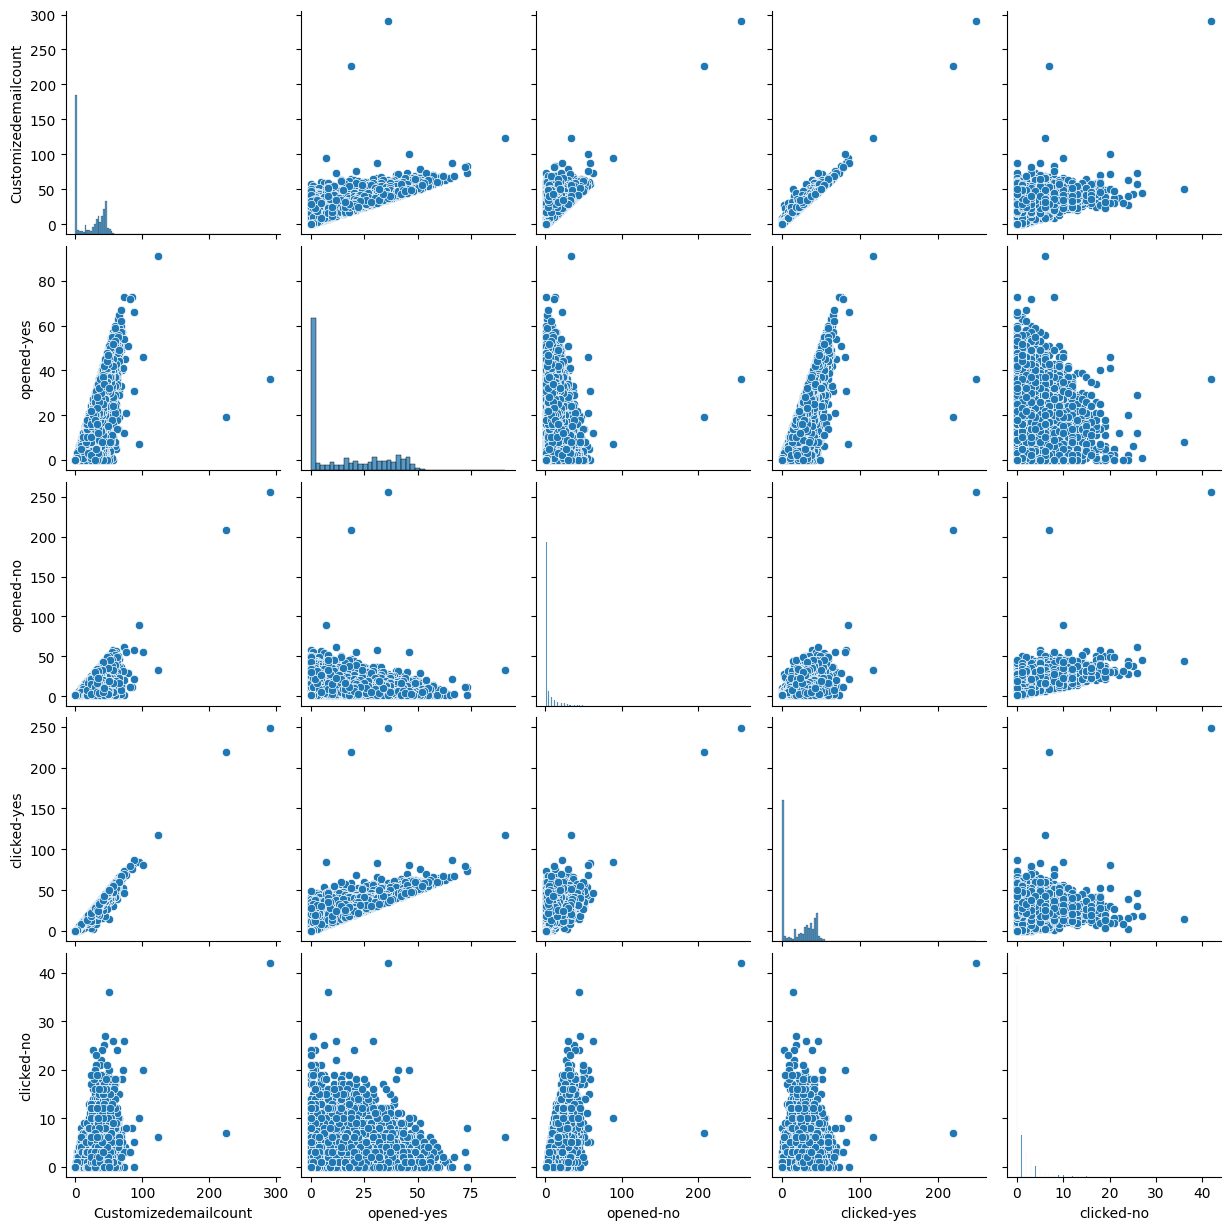

In [1252]:
sns.pairplot(email_data)

In [1253]:
data=pd.merge(data2,email_data,how='outer')
data

CustomerID   City  OnlineCommunication  AutomaticRefill  \
0         C16368  CITY2                    0                0   
1         C20345  CITY2                    1                1   
2         C17683  CITY2                    0                0   
3         C18647  CITY4                    0                0   
4         C36692  CITY2                    1                1   
...          ...    ...                  ...              ...   
23815     C23511  CITY2                    1                1   
23816     C12197  CITY3                    1                0   
23817     C40967  CITY3                    1                0   
23818     C36140  CITY3                    1                1   
23819     C42003  CITY4                    1                0   

       DoorstepDelivery PreferredDeliveryDay RetentionPotential  \
0                     0               Monday               High   
1                     1               Friday                Low   
2                     0            Wednesday             Medium   
3                     0               Monday                Low   
4                     0               Friday                Low   
...                 ...                  ...                ...   
23815                 0               Friday                Low   
23816                 1               Friday                Low   
23817                 0             Saturday                Low   
23818                 0             Saturday                Low   
23819                 0               Friday                Low   

       RetentionPotential_num  City_CITY1  City_CITY2  ...  \
0                           3           0           1  ...   
1                           1           0           1  ...   
2                           2           0           1  ...   
3                           1           0           0  ...   
4                           1           0           1  ...   
...                       ...         ...         ...  ...   
23815                       1           0           1  ...   
23816                       1           0           0  ...   
23817                       1           0           0  ...   
23818                       1           0           0  ...   
23819                       1           0           0  ...   

       DaysSinceRegistration  DaysSinceLastOrder  Days b/w F&L  \
0                       3843                3526             0   
1                       4492                3365          1024   
2                       4569                4293           217   
3                       4514                3721           791   
4                       4872                3368           848   
...                      ...                 ...           ...   
23815                   1906                1906             0   
23816                   1906                1906             0   
23817                   1906                1906             0   
23818                   1906                1902             4   
23819                   1906                1906             0   

       Customizedemailcount  firstemail  lastemail  opened-yes  opened-no  \
0                        29  2012-09-28 2013-07-25           0         30   
1                        95  2010-12-19 2013-12-19           7         89   
2                         0  2010-10-03 2010-10-03           0          1   
3                        30  2010-11-27 2012-12-17           3         28   
4                        64  2009-12-04 2014-01-16          46         19   
...                     ...         ...        ...         ...        ...   
23815                     0  2018-01-17 2018-01-17           0          1   
23816                     0  2018-01-17 2018-01-17           0          1   
23817                     0  2018-01-17 2018-01-17           0          1   
23818                     8  2018-01-17 2018-01-21           2          7   
23819                     0  2018-0

In [1254]:
data=data.drop(['City','RetentionPotential_num'],axis=1)

In [1255]:
encoder=LabelEncoder()
data['PreferredDeliveryDay']=encoder.fit_transform(data['PreferredDeliveryDay'])
data['RetentionPotential']=encoder.fit_transform(data['RetentionPotential'])

In [1256]:
data

CustomerID  OnlineCommunication  AutomaticRefill  DoorstepDelivery  \
0         C16368                    0                0                 0   
1         C20345                    1                1                 1   
2         C17683                    0                0                 0   
3         C18647                    0                0                 0   
4         C36692                    1                1                 0   
...          ...                  ...              ...               ...   
23815     C23511                    1                1                 0   
23816     C12197                    1                0                 1   
23817     C40967                    1                0                 0   
23818     C36140                    1                1                 0   
23819     C42003                    1                0                 0   

       PreferredDeliveryDay  RetentionPotential  City_CITY1  City_CITY2  \
0                         1                   0           0           1   
1                         0                   1           0           1   
2                         6                   2           0           1   
3                         1                   1           0           0   
4                         0                   1           0           1   
...                     ...                 ...         ...         ...   
23815                     0                   1           0           1   
23816                     0                   1           0           0   
23817                     2                   1           0           0   
23818                     2                   1           0           0   
23819                     0                   1           0           0   

       City_CITY3  City_CITY4  ...  DaysSinceRegistration  DaysSinceLastOrder  \
0               0           0  ...                   3843                3526   
1               0           0  ...                   4492                3365   
2               0           0  ...                   4569                4293   
3               0           1  ...                   4514                3721   
4               0           0  ...                   4872                3368   
...           ...         ...  ...                    ...                 ...   
23815           0           0  ...                   1906                1906   
23816           1           0  ...                   1906                1906   
23817           1           0  ...                   1906                1906   
23818           1           0  ...                   1906                1902   
23819           0           1  ...                   1906                1906   

       Days b/w F&L  Customizedemailcount  firstemail  lastemail opened-yes  \
0                 0                    29  2012-09-28 2013-07-25          0   
1              1024                    95  2010-12-19 2013-12-19          7   
2               217                     0  2010-10-03 2010-10-03          0   
3               791                    30  2010-11-27 2012-12-17          3   
4               848                    64  2009-12-04 2014-01-16         46   
...             ...                   ...         ...        ...        ...   
23815             0                     0  2018-01-17 2018-01-17          0   
23816             0                     0  2018-01-17 2018-01-17          0   
23817             0                     0  2018-01-17 2018-01-17          0   
23818             4                     8  2018-01-17 2018-01-21          2   
23819             0                     0  2018-01-17 2018-01-17          0   

      opened-no  clicked-yes  clicked-no  
0            30           28           1  
1            89           85          10  
2             1            0           0  
3            28           26           4  
4            19           54          10  
...         

In [1257]:
data['DaysSincelastEmail']=(current_date - data['lastemail']).dt.days

In [1258]:
data['diff b\w firstmail and order']= (transactiondata['DateofOrder'] - data['firstemail']).dt.days
data.head()

CustomerID  OnlineCommunication  AutomaticRefill  DoorstepDelivery  \
0     C16368                    0                0                 0   
1     C20345                    1                1                 1   
2     C17683                    0                0                 0   
3     C18647                    0                0                 0   
4     C36692                    1                1                 0   

   PreferredDeliveryDay  RetentionPotential  City_CITY1  City_CITY2  \
0                     1                   0           0           1   
1                     0                   1           0           1   
2                     6                   2           0           1   
3                     1                   1           0           0   
4                     0                   1           0           1   

   City_CITY3  City_CITY4  ...  Days b/w F&L  Customizedemailcount  \
0           0           0  ...             0                    29   
1           0           0  ...          1024                    95   
2           0           0  ...           217                     0   
3           0           1  ...           791                    30   
4           0           0  ...           848                    64   

   firstemail  lastemail  opened-yes  opened-no clicked-yes clicked-no  \
0  2012-09-28 2013-07-25           0         30          28          1   
1  2010-12-19 2013-12-19           7         89          85         10   
2  2010-10-03 2010-10-03           0          1           0          0   
3  2010-11-27 2012-12-17           3         28          26          4   
4  2009-12-04 2014-01-16          46         19          54         10   

   DaysSincelastEmail  diff b\w firstmail and order  
0                3543                           370  
1                3396                          1082  
2                4569                          1073  
3                3763                          1060  
4                3368                          1498  

[5 rows x 24 columns]

In [1259]:
data=data.drop(['firstemail','lastemail'],axis=1)

In [1260]:
corrr=data.corr().abs()
corrr

OnlineCommunication  AutomaticRefill  \
OnlineCommunication                      1.000000         0.176233   
AutomaticRefill                          0.176233         1.000000   
DoorstepDelivery                         0.097039         0.185477   
PreferredDeliveryDay                     0.046521         0.038464   
RetentionPotential                       0.096118         0.132296   
City_CITY1                               0.106306         0.008107   
City_CITY2                               0.245872         0.022940   
City_CITY3                               0.243498         0.045943   
City_CITY4                               0.043592         0.067236   
OrderQuantity                            0.065848         0.050431   
days b/w R&F                             0.243754         0.016852   
DaysSinceRegistration                    0.408492         0.088651   
DaysSinceLastOrder                       0.317616         0.086685   
Days b/w F&L                             0.226190         0.015294   
Customizedemailcount                     0.140738         0.010611   
opened-yes                               0.174986         0.039579   
opened-no                                0.023039         0.105075   
clicked-yes                              0.157815         0.008468   
clicked-no                               0.086092         0.157804   
DaysSincelastEmail                       0.334670         0.091982   
diff b\w firstmail and order             0.297095         0.064103   

                              DoorstepDelivery  PreferredDeliveryDay  \
OnlineCommunication                   0.097039              0.046521   
AutomaticRefill                       0.185477              0.038464   
DoorstepDelivery                      1.000000              0.041438   
PreferredDeliveryDay                  0.041438              1.000000   
RetentionPotential                    0.063044              0.011308   
City_CITY1                            0.033705              0.041184   
City_CITY2                            0.103584              0.012114   
City_CITY3                            0.202634              0.013133   
City_CITY4                            0.104770              0.042604   
OrderQuantity                         0.095646              0.019227   
days b/w R&F                          0.010269              0.002103   
DaysSinceRegistration                 0.058778              0.018916   
DaysSinceLastOrder                    0.063417              0.023632   
Days b/w F&L                          0.007541              0.011613   
Customizedemailcount                  0.053197              0.015438   
opened-yes                            0.001912              0.013228   
opened-no                             0.121297              0.009550   
clicked-yes                           0.037939              0.016387   
clicked-no                            0.142617              0.001990   
DaysSincelastEmail                    0.066492              0.024454   
diff b\w firstmail and order          0.040484              0.004596   

                              RetentionPotential  City_CITY1  City_CITY2  \
OnlineCommunication                     0.096118    0.106306    0.245872   
AutomaticRefill                         0.132296    0.008107    0.022940   
DoorstepDelivery                        0.063044    0.033705    0.103584   
PreferredDeliveryDay                    0.011308    0.041184    0.012114   
RetentionPotential                      1.000000    0.026488    0.006081   
City_CITY1                              0.026488    1.000000    0.153600   
City_CITY2                              0.006081    0.153600    1.000000   
City_CITY3                              0.008638    0.147509    0.389957   
City_CITY4                              0.025984    0.190249    0.502943   
OrderQuantity                           0.135222    0.028403    0.133187   
days b/w R&F                            0.029730    0.035333    0.11

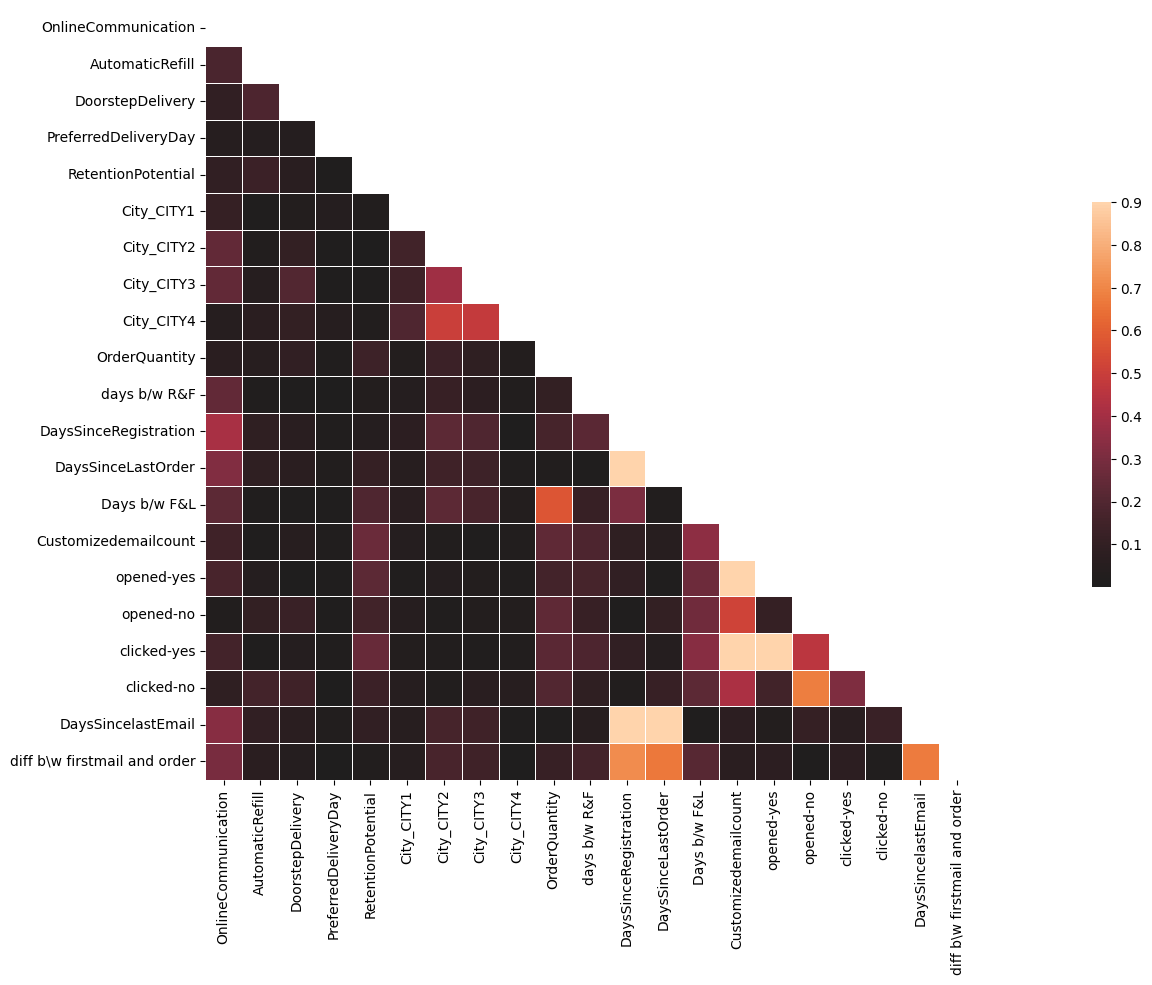

In [1261]:
mask = np.triu(np.ones_like(corrr, dtype=bool))
fig, ax = plt.subplots(figsize=(30, 10))
sns.heatmap(corrr, mask=mask,vmax=.9, center=0,
            square=True, linewidths=.60, cbar_kws={"shrink": .5})
plt.show()

In [1262]:
data.dtypes

CustomerID                      object
OnlineCommunication              int64
AutomaticRefill                  int64
DoorstepDelivery                 int64
PreferredDeliveryDay             int64
RetentionPotential               int64
City_CITY1                       uint8
City_CITY2                       uint8
City_CITY3                       uint8
City_CITY4                       uint8
OrderQuantity                    int64
days b/w R&F                     int64
DaysSinceRegistration            int64
DaysSinceLastOrder               int64
Days b/w F&L                     int64
Customizedemailcount             int64
opened-yes                       int64
opened-no                        int64
clicked-yes                      int64
clicked-no                       int64
DaysSincelastEmail               int64
diff b\w firstmail and order     int64
dtype: object

In [1263]:
plotcols=['RetentionPotential','OrderQuantity','days b/w R&F','DaysSinceRegistration','DaysSinceLastOrder','Days b/w F&L','Customizedemailcount','opened-yes','opened-no','clicked-yes','clicked-no','DaysSincelastEmail','diff b\w firstmail and order']

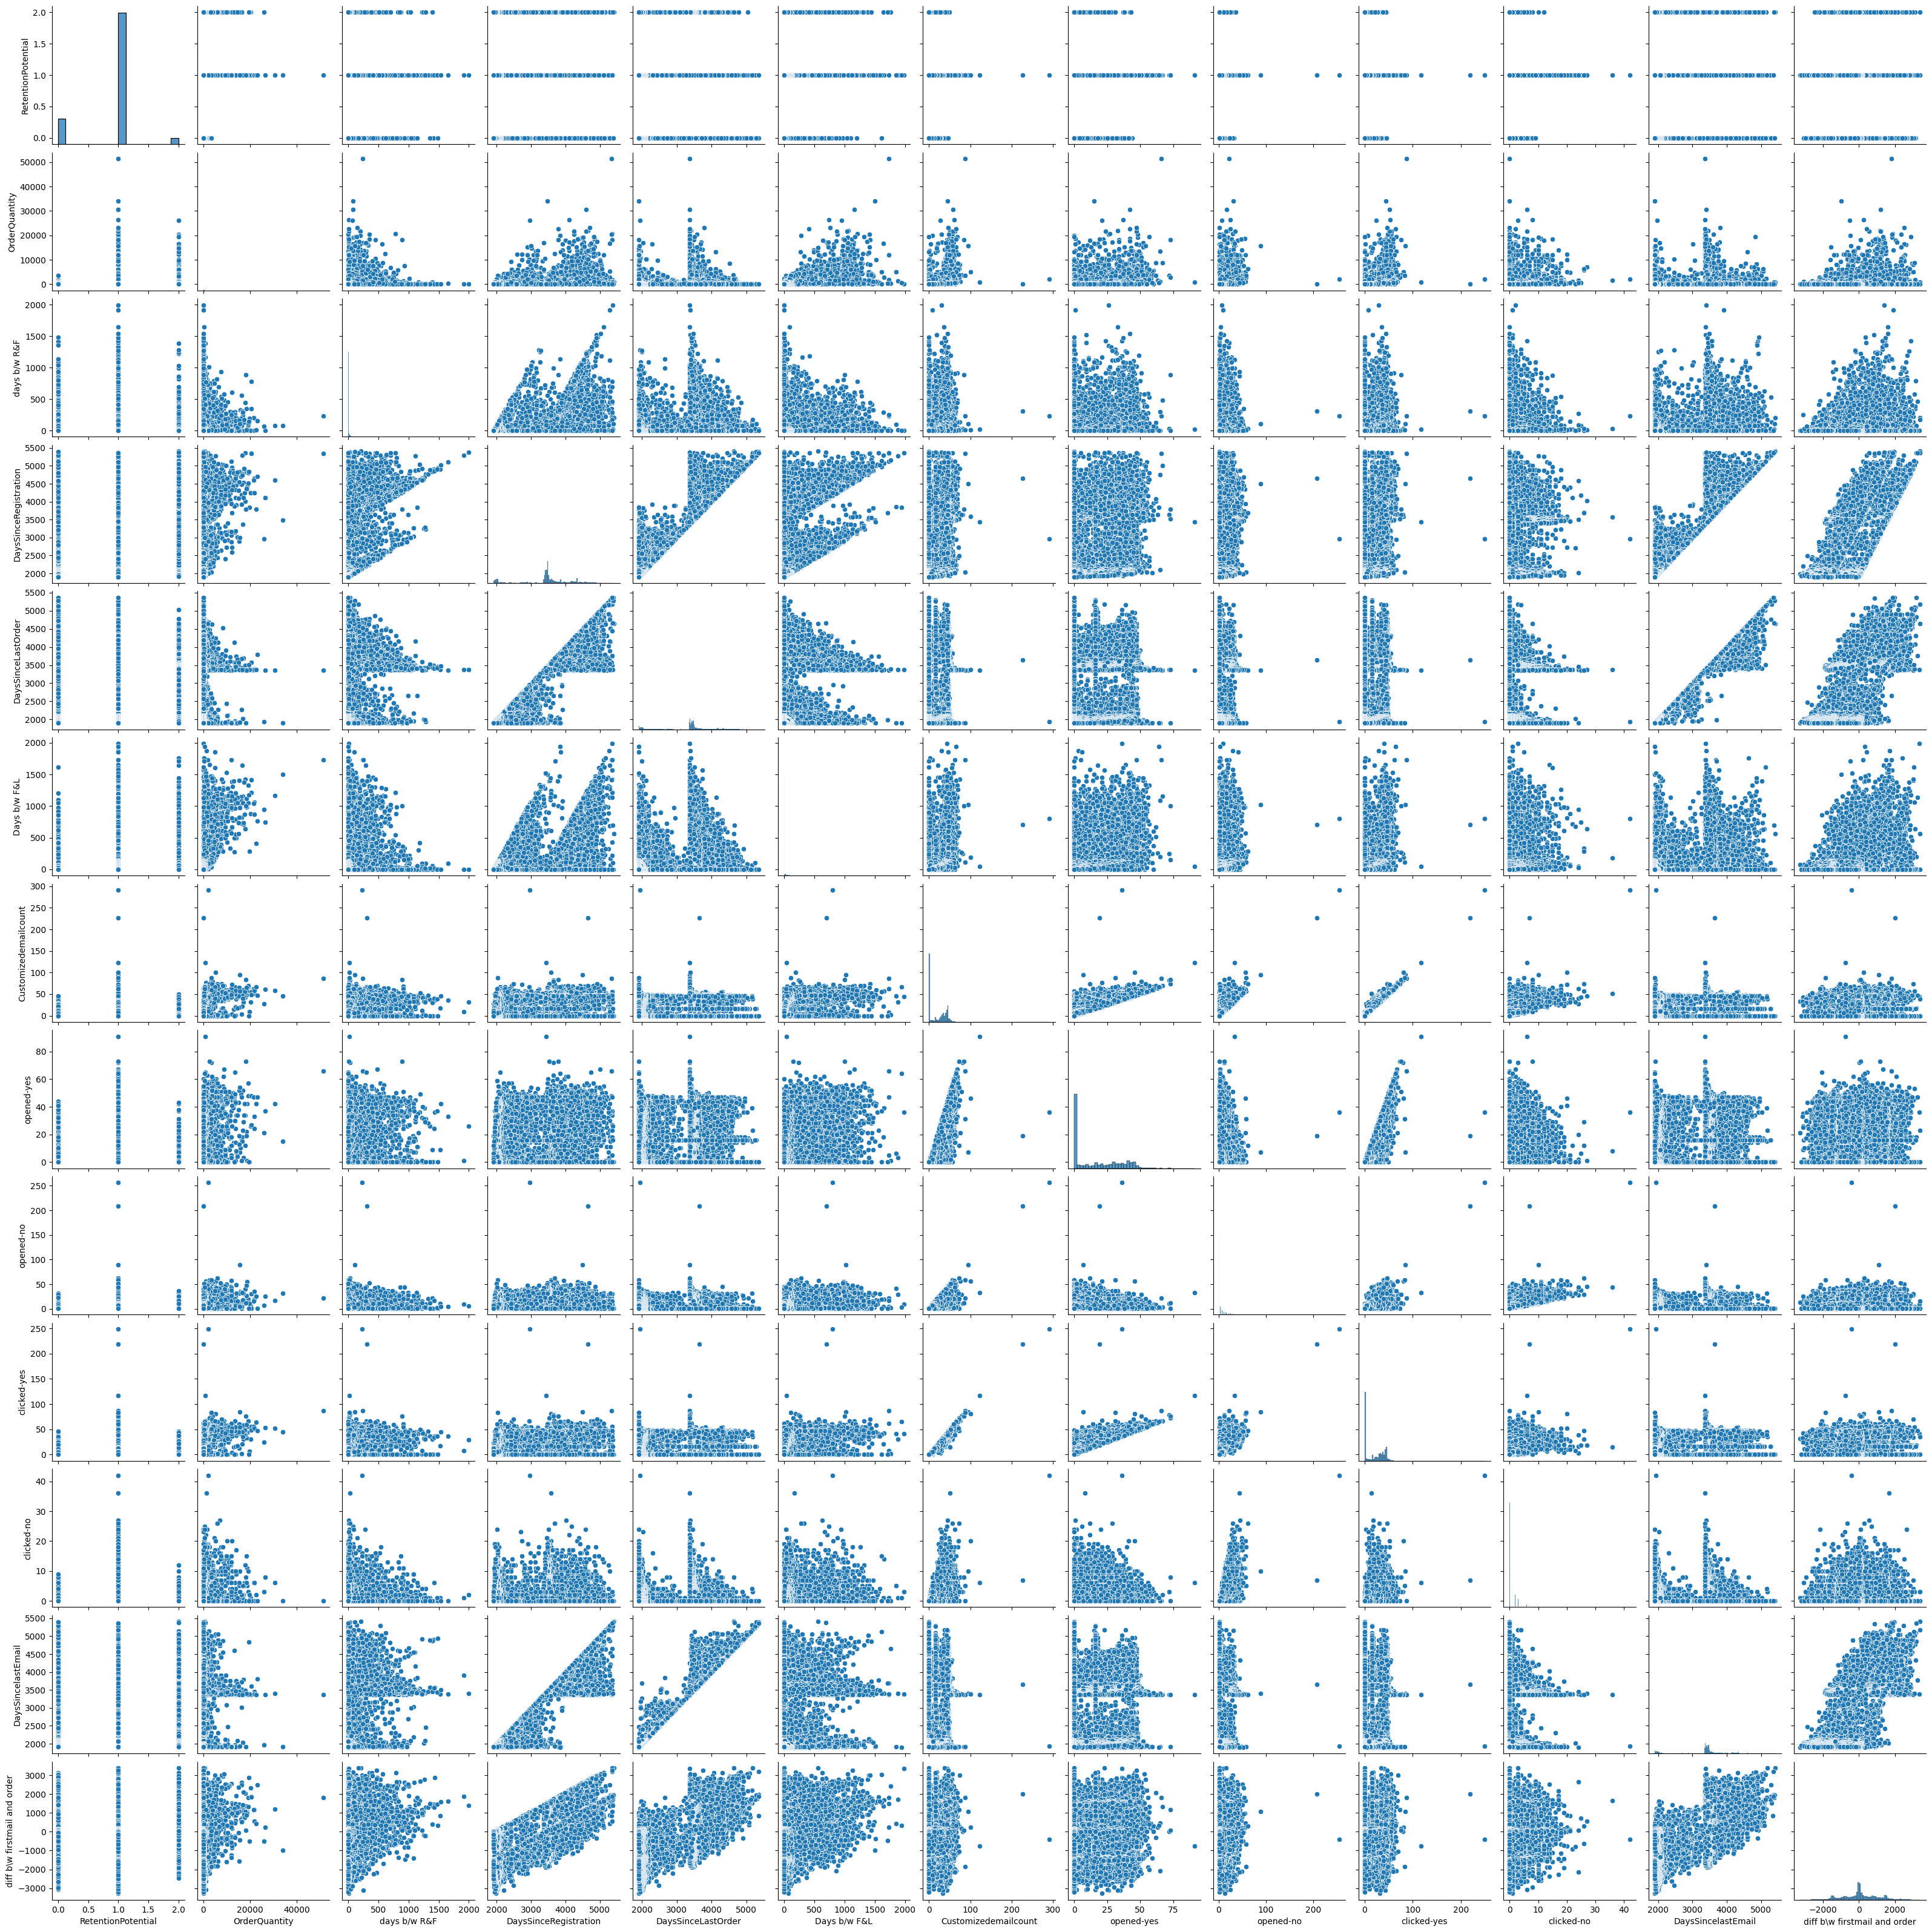

In [1264]:
sns.pairplot(data[plotcols])

In [1265]:
train=data.drop(['OnlineCommunication','AutomaticRefill','PreferredDeliveryDay','CustomerID'],axis=1)

In [1266]:
to_scale=['OrderQuantity','days b/w R&F','DaysSinceRegistration','DaysSinceLastOrder','Days b/w F&L','Customizedemailcount','DaysSincelastEmail','diff b\w firstmail and order']

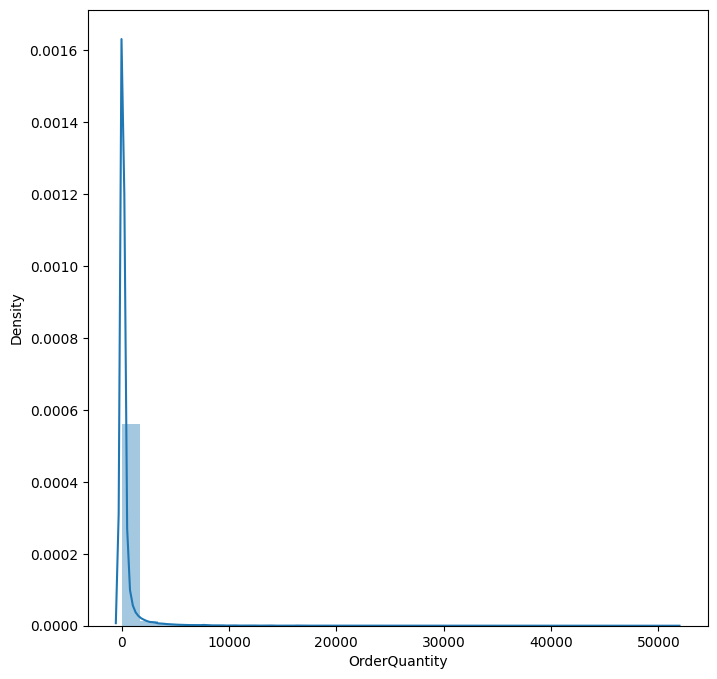

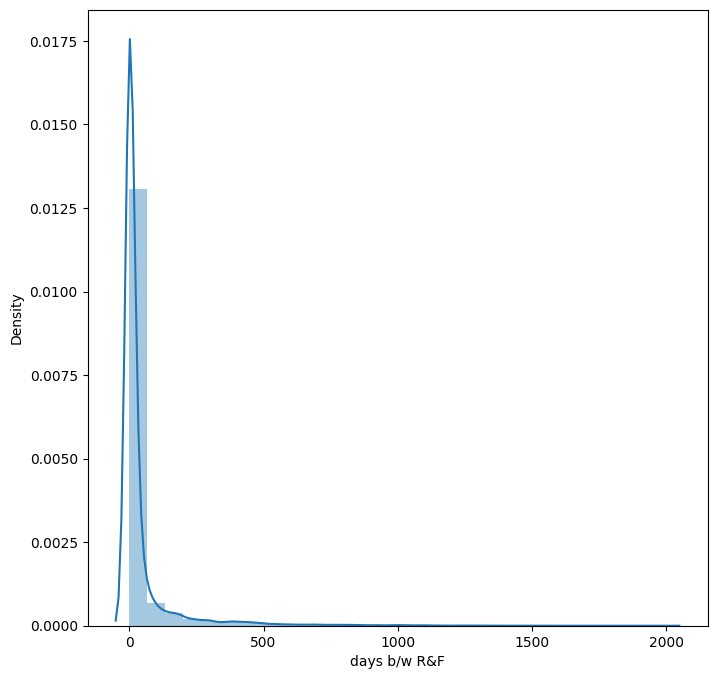

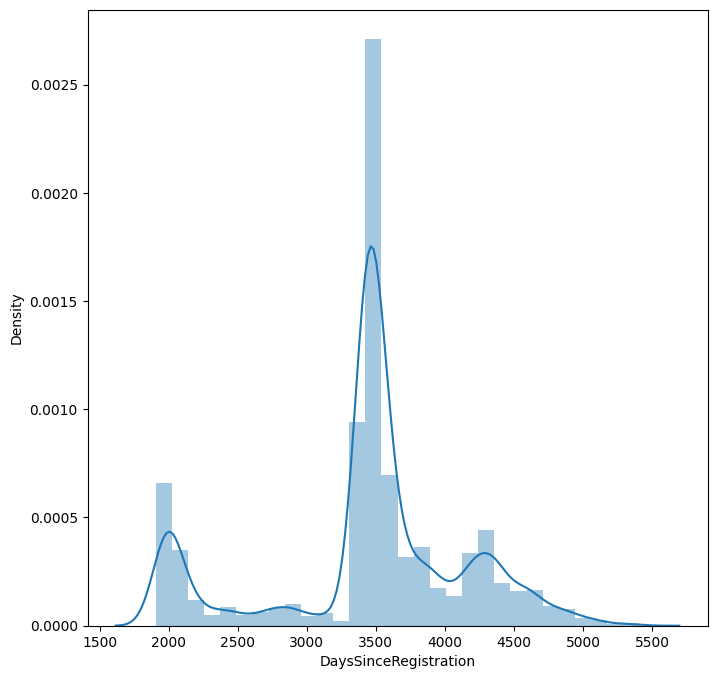

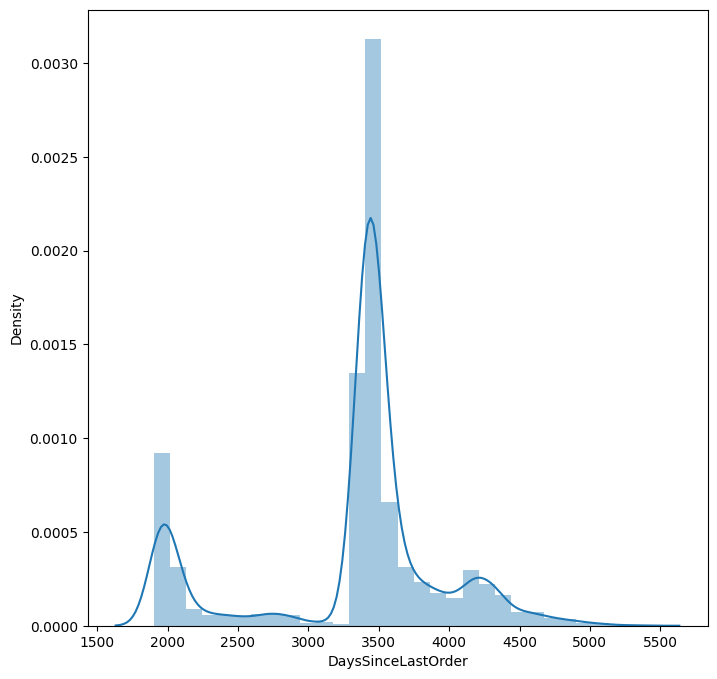

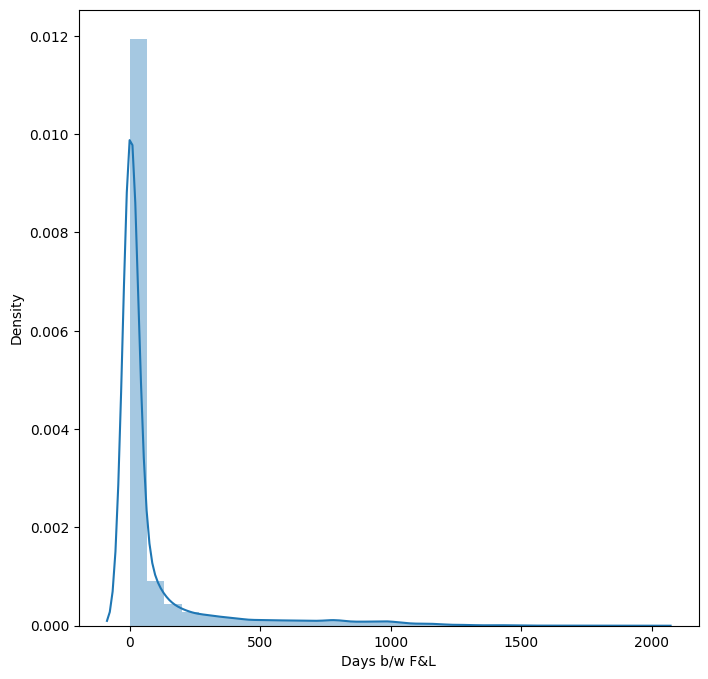

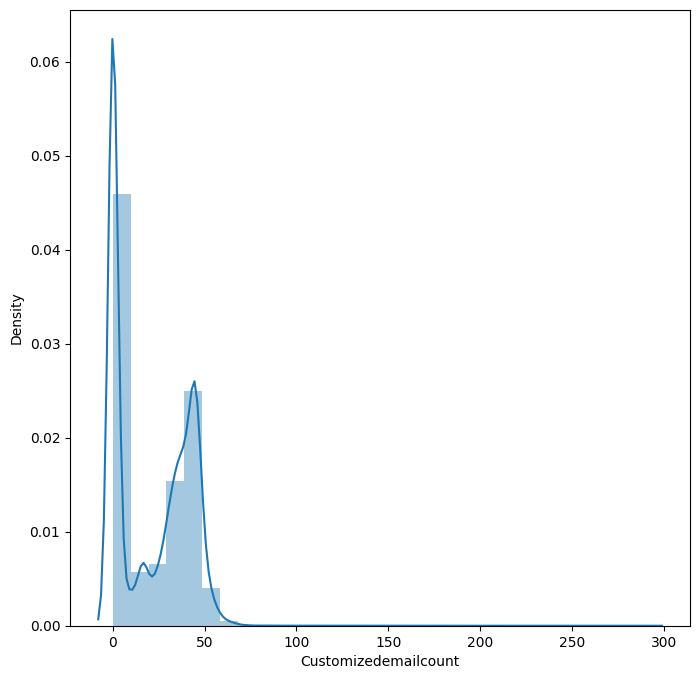

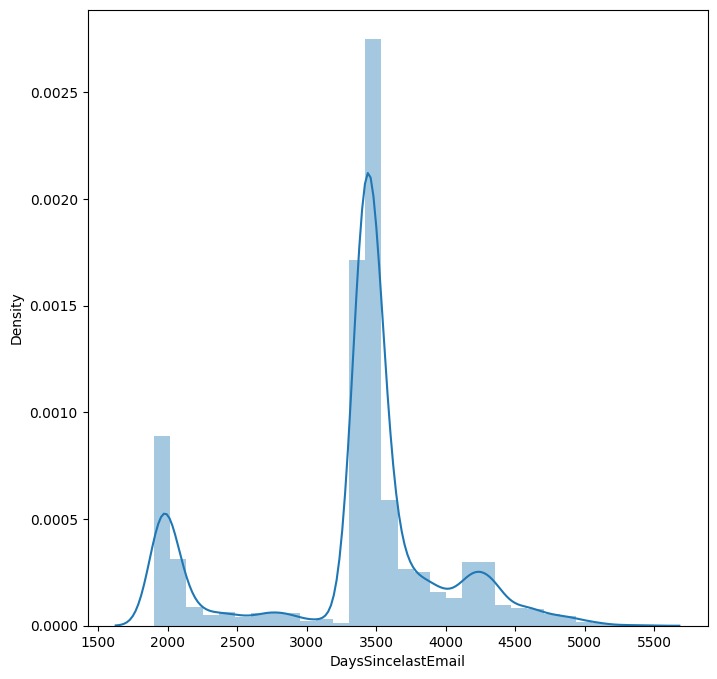

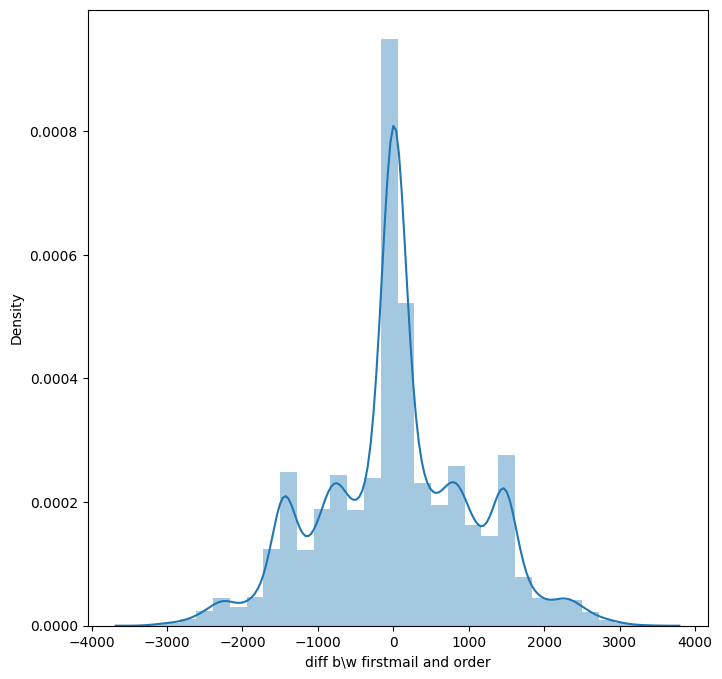

In [1267]:
for col in to_scale:
    plt.figure(figsize = (8, 8))
    sns.distplot(train[col],bins=30)
    plt.show()

In [1268]:
scaler=StandardScaler()
train[['OrderQuantity','days b/w R&F','DaysSinceRegistration','DaysSinceLastOrder','Days b/w F&L','Customizedemailcount','DaysSincelastEmail','diff b\w firstmail and order']]=scaler.fit_transform(train[['OrderQuantity','days b/w R&F','DaysSinceRegistration','DaysSinceLastOrder','Days b/w F&L','Customizedemailcount','DaysSincelastEmail','diff b\w firstmail and order']])

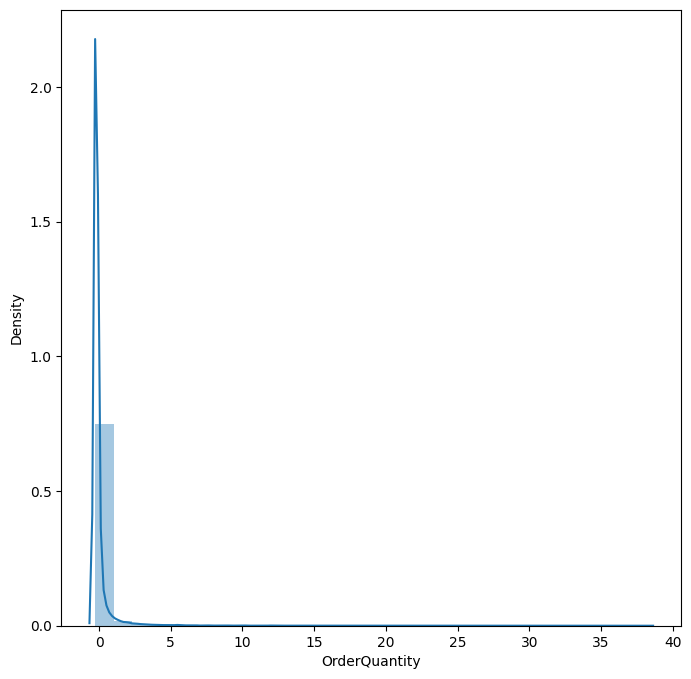

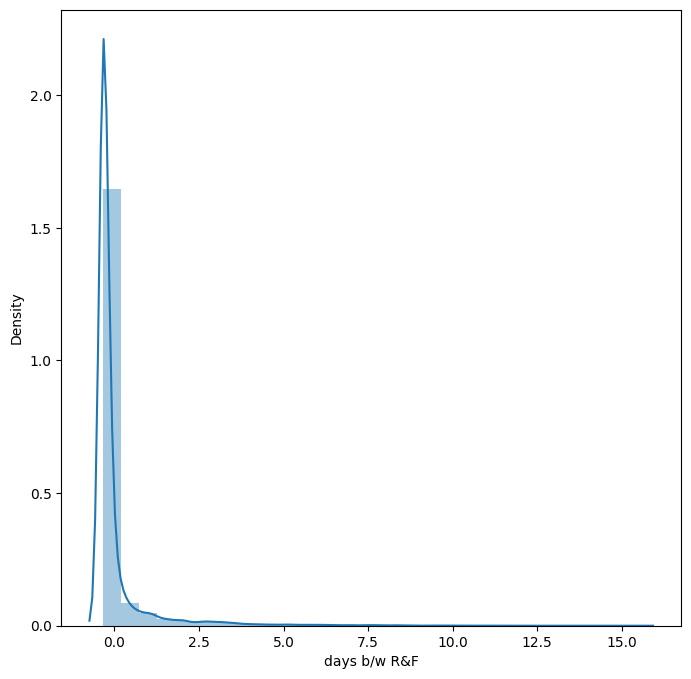

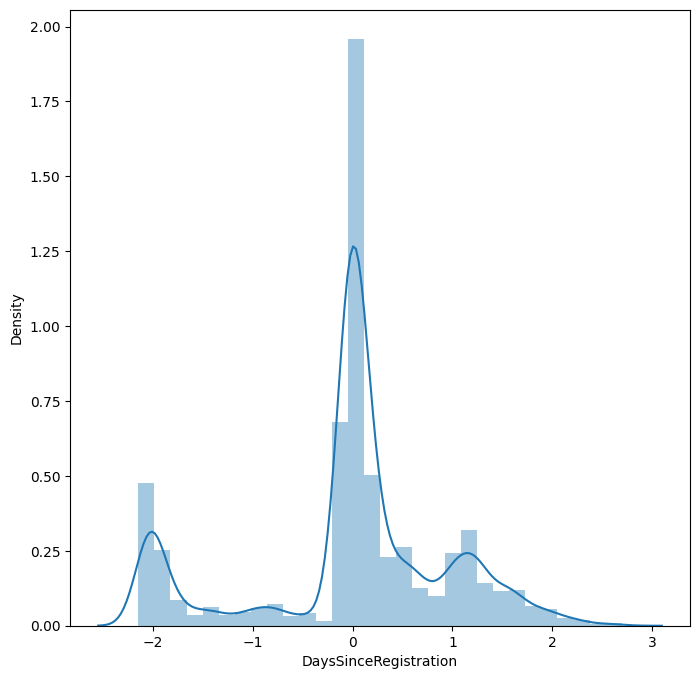

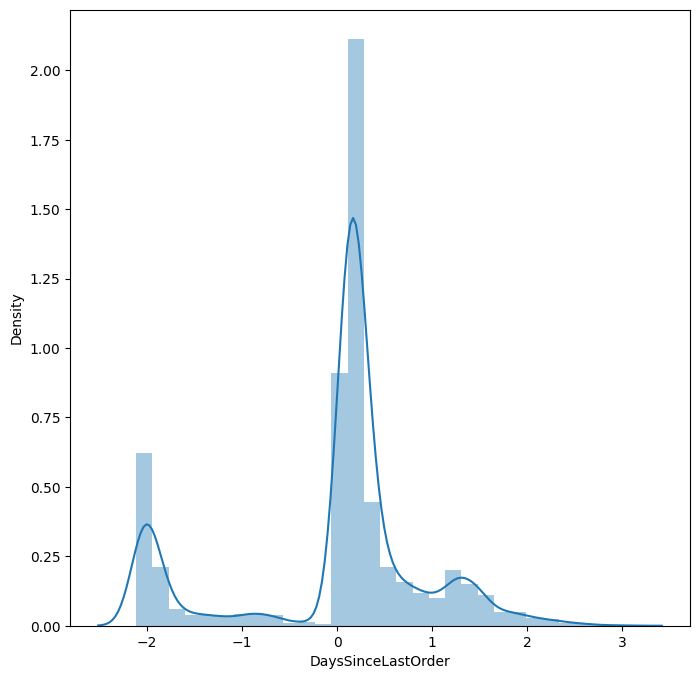

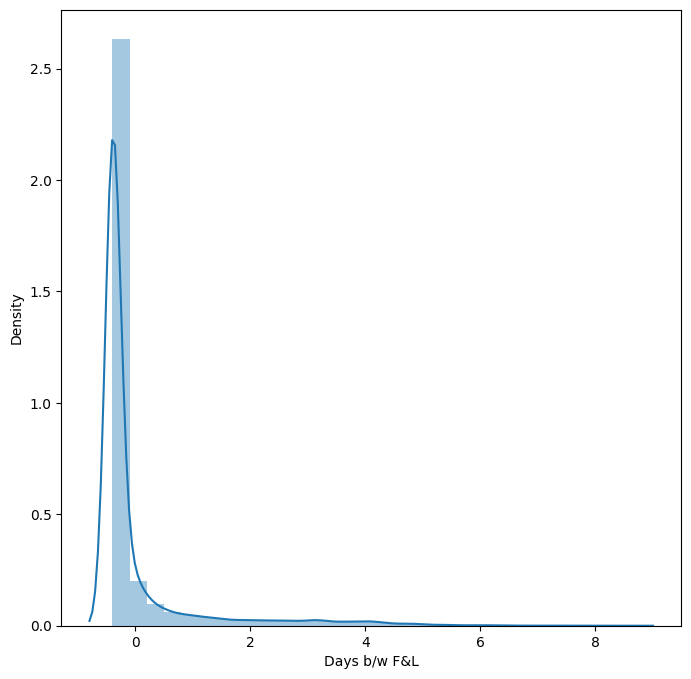

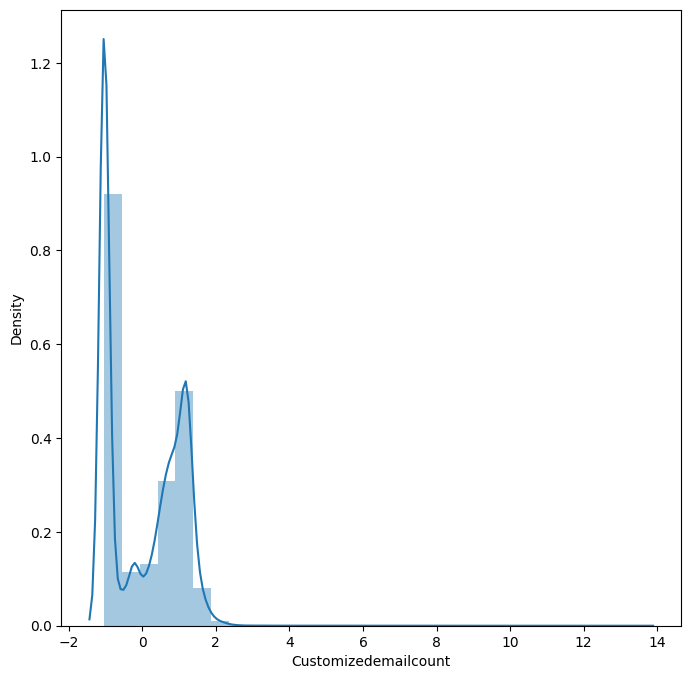

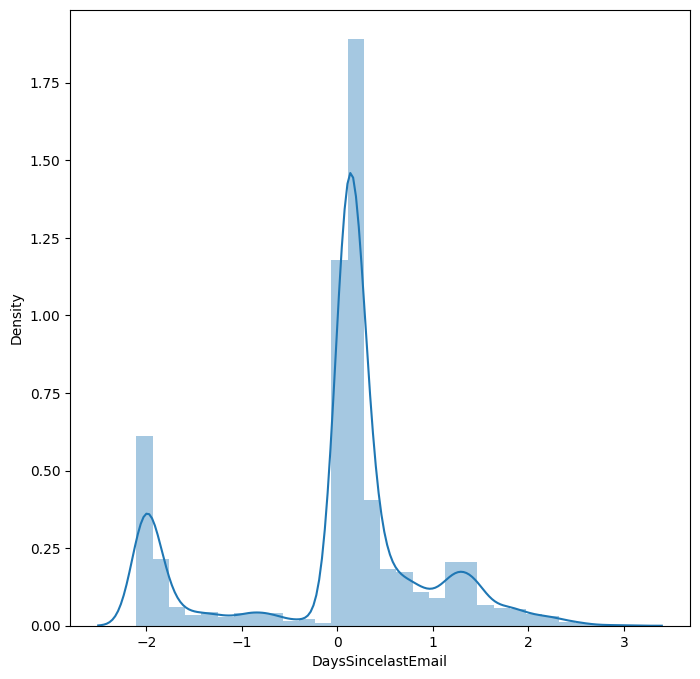

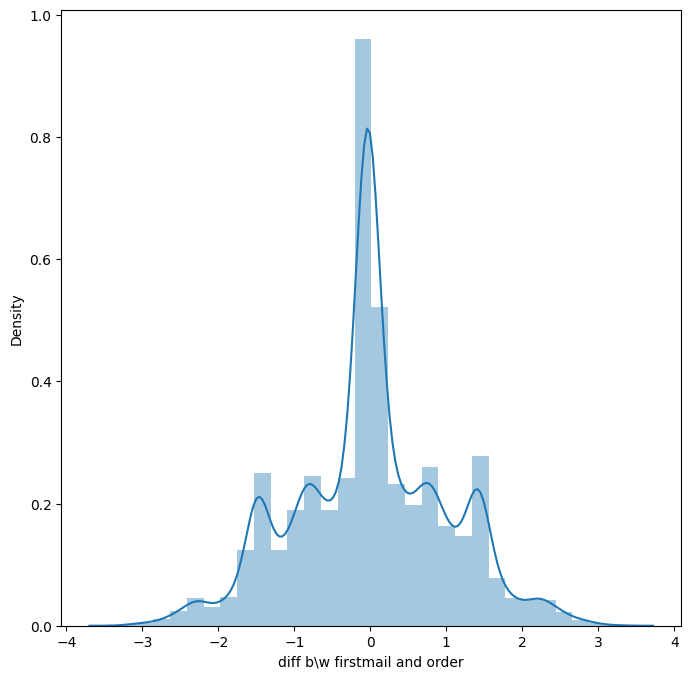

In [1269]:
for col in to_scale:
    plt.figure(figsize = (8, 8))
    sns.distplot(train[col],bins=30)
    plt.show()

In [1270]:
from sklearn.preprocessing import QuantileTransformer
qt = QuantileTransformer(n_quantiles=100, output_distribution='normal')

In [1271]:
train[to_scale] = qt.fit_transform(train[to_scale])

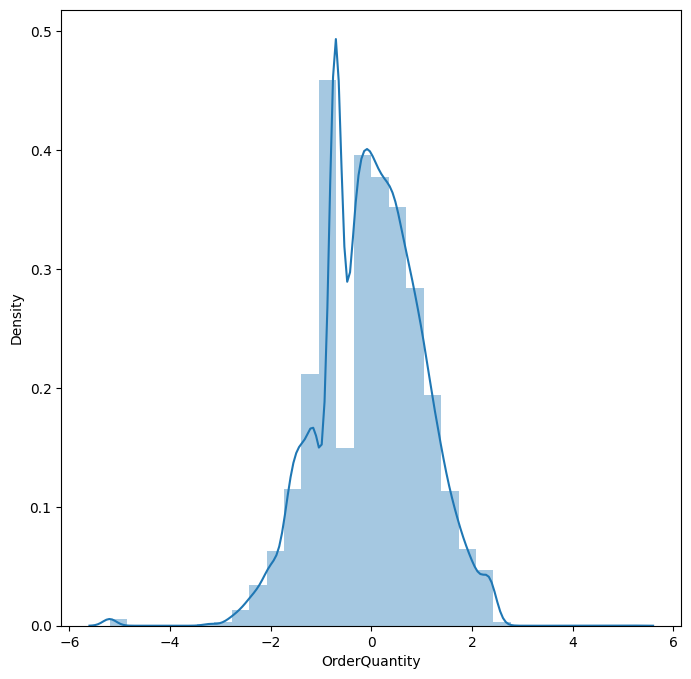

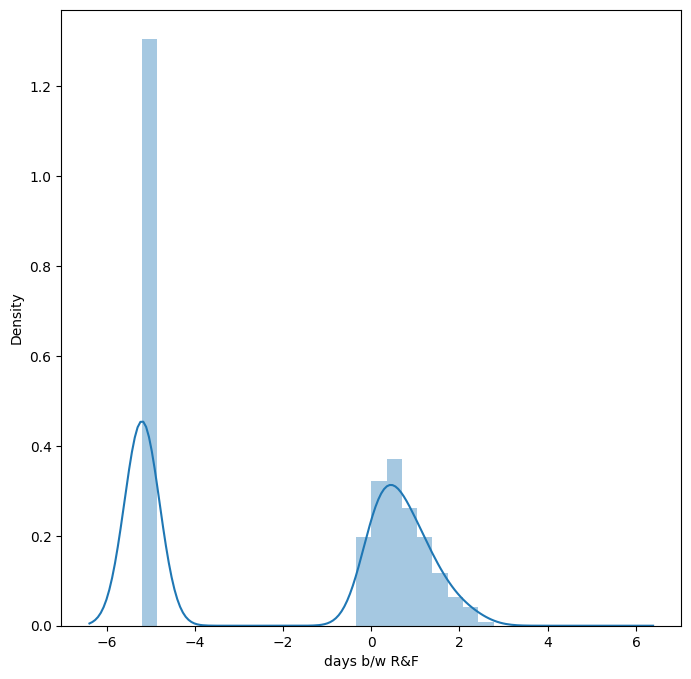

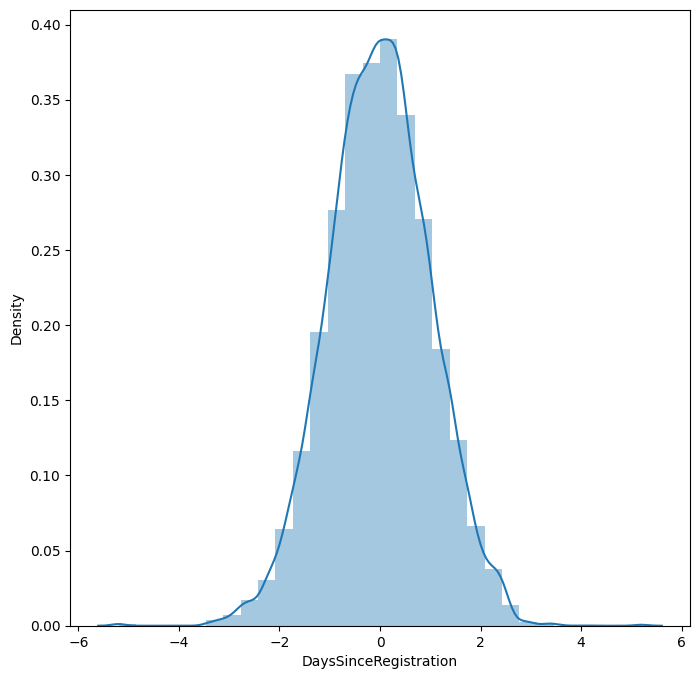

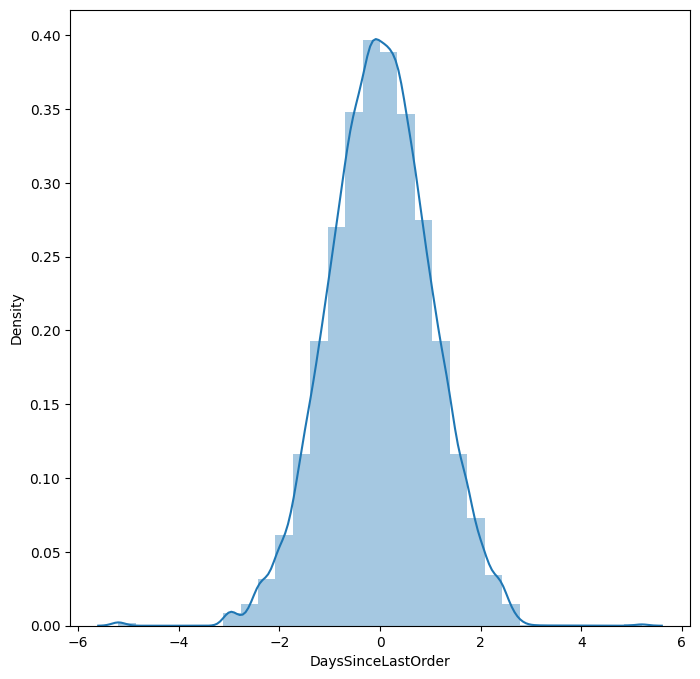

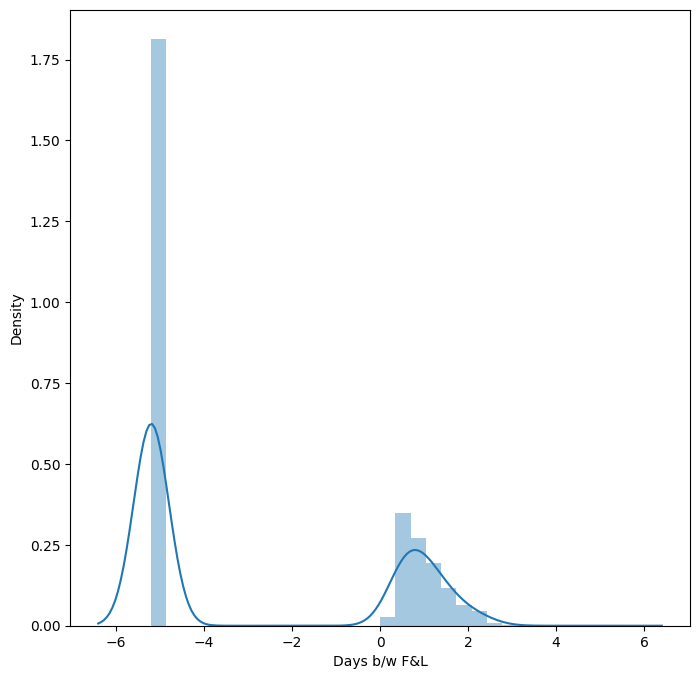

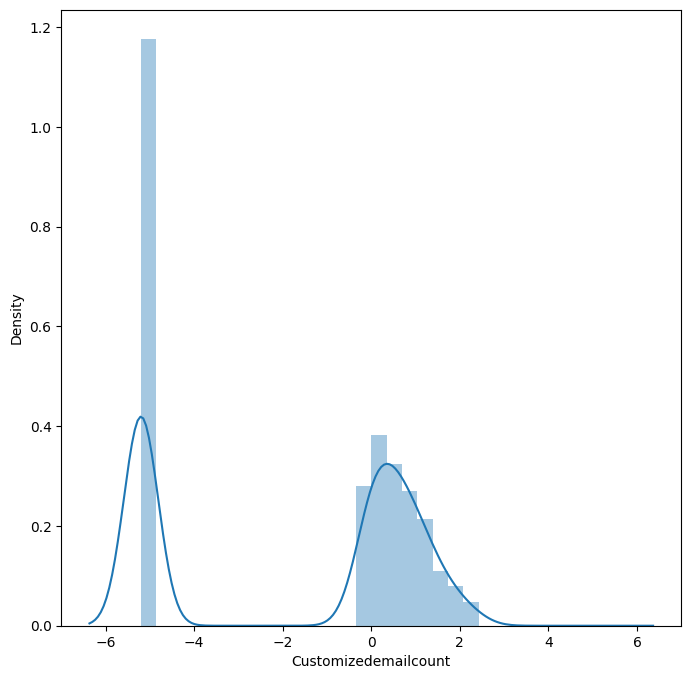

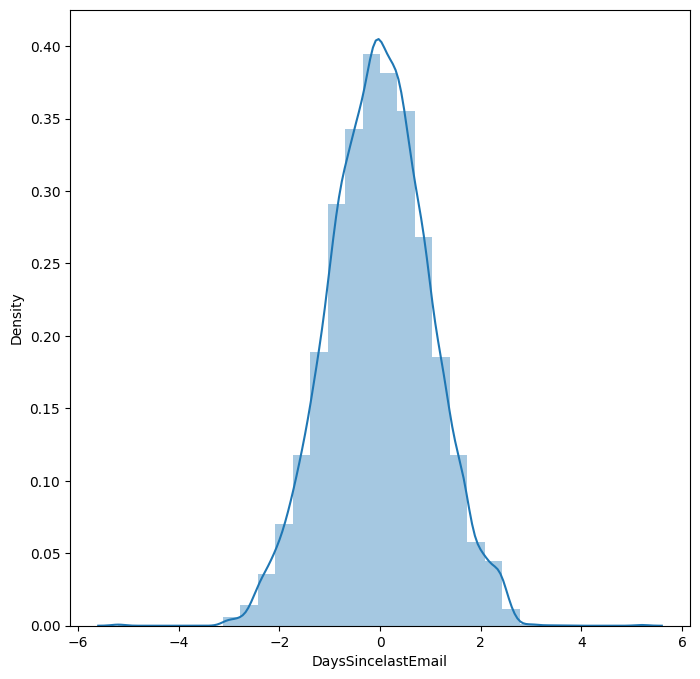

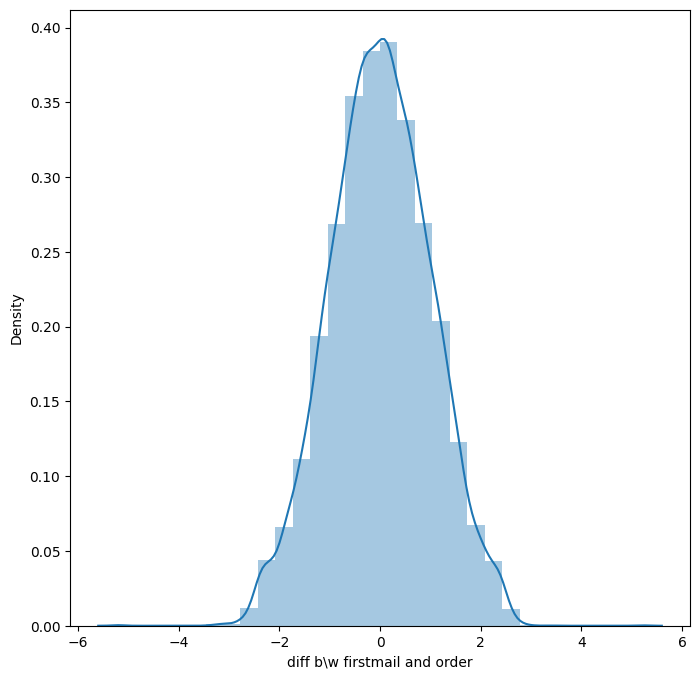

In [1272]:
for col in to_scale:
    plt.figure(figsize = (8, 8))
    sns.distplot(train[col],bins=30)
    plt.show()

# Model Building

In [1273]:
X = train.drop(['RetentionPotential'], axis=1)
y = train[['RetentionPotential']]

In [1274]:
X

DoorstepDelivery  City_CITY1  City_CITY2  City_CITY3  City_CITY4  \
0                     0           0           1           0           0   
1                     1           0           1           0           0   
2                     0           0           1           0           0   
3                     0           0           0           0           1   
4                     0           0           1           0           0   
...                 ...         ...         ...         ...         ...   
23815                 0           0           1           0           0   
23816                 1           0           0           1           0   
23817                 0           0           0           1           0   
23818                 0           0           0           1           0   
23819                 0           0           0           0           1   

       OrderQuantity  days b/w R&F  DaysSinceRegistration  DaysSinceLastOrder  \
0          -2.348381      1.761319               0.687104            0.581365   
1           2.414009      1.278305               1.515956           -0.799083   
2           1.121963      1.073988               1.632687            1.603540   
3           1.354230      0.088734               1.542325            0.921884   
4           1.872409      2.280770               2.213231           -0.764710   
...              ...           ...                    ...                 ...   
23815      -0.714776     -5.199338              -5.199338           -2.525785   
23816      -0.114185     -5.199338              -5.199338           -2.525785   
23817      -1.366707     -5.199338              -5.199338           -2.525785   
23818       0.357739     -5.199338              -5.199338           -5.199338   
23819      -0.714776     -5.199338              -5.199338           -2.525785   

       Days b/w F&L  Customizedemailcount  opened-yes  opened-no  clicked-yes  \
0         -5.199338              0.139710           0         30           28   
1          2.253265              2.389979           7         89           85   
2          1.190490             -5.199338           0          1            0   
3          1.844217              0.165327           3         28           26   
4          1.925230              2.335558          46         19           54   
...             ...                   ...         ...        ...          ...   
23815     -5.199338             -5.199338           0          1            0   
23816     -5.199338             -5.199338           0          1            0   
23817     -5.199338             -5.199338           0          1            0   
23818      0.335333             -0.165327           2          7            5   
23819     -5.199338             -5.199338           0          1            0   

       clicked-no  DaysSincelastEmail  diff b\w firstmail and order  
0               1            0.574460                      0.493757  
1              10           -0.477513                      1.018508  
2               0            1.934087                      1.013132  
3               4            0.889836                      1.005417  
4              10           -0.810751                      1.423297  
...           ...                 ...                           ...  
23815           0           -2.572352                     -2.390744  
23816           0           -2.572352                     -1.567560  
23817           0           -2.572352                     -1.685836  
23818           3           -5.199338                     -2.256391  
23819           0           -2.572352                     -1.802548  

[23820 rows x 17 columns]

In [1275]:
y

RetentionPotential
0                       0
1                       1
2                       2
3                       1
4                       1
...                   ...
23815                   1
23816                   1
23817                   1
23818                   1
23819                   1

[23820 rows x 1 columns]

In [1276]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [1277]:
clf = DecisionTreeClassifier(max_depth=7)

In [1278]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=7)

In [1279]:
y_pred = clf.predict(X_test)

In [1280]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print('-------------------------------------------')

confusion = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", confusion)

Accuracy: 0.9042821158690176
-------------------------------------------
Confusion Matrix:
 [[ 460  276   18]
 [ 105 3713    8]
 [  19   30  135]]


In [1281]:
# Define the parameter grid to search
param_grid = {'max_depth': [2, 3, 5, 7, 9],
              'min_samples_split': [2,3,4,5,6,7,8,9,10,11,12],
              'min_samples_leaf': [1, 2, 4, 6, 8],
              'criterion': ['gini', 'entropy']}

# Create a decision tree classifier
clf = DecisionTreeClassifier()

# Create a GridSearchCV object and fit it to the data
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and the corresponding accuracy
print("Best parameters:", grid_search.best_params_)
print("Best accuracy:", grid_search.best_score_)

Best parameters: {'criterion': 'entropy', 'max_depth': 7, 'min_samples_leaf': 4, 'min_samples_split': 7}
Best accuracy: 0.902970304935484
